#MAJOR PROJECT PART-2 (1)
DATA ANALYTICS TOWARDS MONITORING THE IMPACT OF MOBILE PHONE ON USER HEALTH AND USER MOBILE RECOMMENDATION USING SENTIMENT ANALYSIS

##Enrollment Number: 19103048
##Name of Student: RITIK RUSTAGI
##Name of Supervisor: Dr. Ankit Vidyarthi


#JAYPEE INSTITUTE OF INFORMATION TECHNOLOGY, NOIDA



In [ ]:
!python --version

Python 3.9.16


#IMPORTING DATASET

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import csv
# import urllib2

# url = 'https://docs.google.com/spreadsheets/d/12lewKVuFIuT71qZyqN0AuEC_eyzb5OPcnGuxf6XHd-c/edit?usp=share_link'
# response = urllib2.urlopen(url)
# df = csv.reader(response)

df = pd.read_csv('Responses.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head(10)

Timestamp Gender Date of Birth Mobile Phone Brand iPhone Model  \
0  12/10/2022 22:25:10   Male    19/10/2001            Oneplus          NaN   
1  12/10/2022 22:35:30   Male    27/10/2000            Oneplus          NaN   
2  12/10/2022 22:46:25   Male    23/06/1999            Samsung          NaN   
3  12/10/2022 22:58:30   Male    08/12/2000            Oneplus          NaN   
4  12/10/2022 23:01:23   Male    12/03/2001             Realme          NaN   
5  12/10/2022 23:03:14   Male    31/07/2000             Realme          NaN   
6  12/10/2022 23:06:07   Male    17/08/2000            Samsung          NaN   
7  12/10/2022 23:06:38   Male    01/03/2000             Xiaomi          NaN   
8  12/10/2022 23:08:30   Male    15/11/2001             Realme          NaN   
9  12/10/2022 23:09:25   Male    31/05/2000              Apple           11   

  Mobile Phone Model  Mobile Phone Model.1 Mobile Phone Model.2  \
0                NaN                   NaN              NORD CE   
1                NaN                   NaN                   7T   
2                NaN                   NaN                  NaN   
3                NaN                   NaN               Nord 2   
4                NaN                   NaN                  NaN   
5                NaN                   NaN                  NaN   
6                NaN                   NaN                  NaN   
7                NaN                   NaN                  NaN   
8                NaN                   NaN                  NaN   
9                NaN                   NaN                  NaN   

  Mobile Phone Model.3 Mobile Phone Model.4 Mobile Phone Model.5  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                3 Pro   
5                  NaN                  NaN                Other   
6                  NaN                  NaN                  NaN   
7                  NaN                  NaN                  NaN   
8                  NaN                  NaN                    6   
9                  NaN                  NaN                  NaN   

  Mobile Phone Series Mobile Phone Model.6 Mobile Phone Model.7  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2            Galaxy A                  A71                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   
5                 NaN                  NaN                  NaN   
6            Galaxy M                 M 32                  NaN   
7                 NaN                  NaN                  NaN   
8                 NaN                  NaN                  NaN   
9                 NaN                  NaN                  NaN   

  Mobile Phone Model.8 Mobile Phone Brand.1 Mobile Phone Model.9  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   
5                  NaN               Realme                   U1   
6                  NaN                  NaN                  NaN   
7                  11i                  NaN                  NaN   
8                  NaN                  NaN                  NaN   
9                  NaN                  NaN                  NaN   

  Mobile Phone Usage (in hours) Average time spent over calling (in a day)  \
0               between 2 and 4                                  30 minute   
1            

In [ ]:
df.shape

(292, 41)

In [ ]:
# t = 'Do you wear spectacles? '
# print(df[t].value_counts())
# print((df[t].value_counts(normalize=True) * 100).round(1))

#DATA CLEANING

##Converting Date of Birth to Age

In [ ]:
from datetime import datetime, date
def age(born):
  born = datetime.strptime(born, "%d/%m/%Y").date()
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
df['Date of Birth'] = df['Date of Birth'].apply(age)
df.rename(columns = {'Date of Birth' : 'Age'}, inplace = True)
df.head()

Timestamp Gender  Age Mobile Phone Brand iPhone Model  \
0  12/10/2022 22:25:10   Male   21            Oneplus          NaN   
1  12/10/2022 22:35:30   Male   22            Oneplus          NaN   
2  12/10/2022 22:46:25   Male   23            Samsung          NaN   
3  12/10/2022 22:58:30   Male   22            Oneplus          NaN   
4  12/10/2022 23:01:23   Male   22             Realme          NaN   

  Mobile Phone Model  Mobile Phone Model.1 Mobile Phone Model.2  \
0                NaN                   NaN              NORD CE   
1                NaN                   NaN                   7T   
2                NaN                   NaN                  NaN   
3                NaN                   NaN               Nord 2   
4                NaN                   NaN                  NaN   

  Mobile Phone Model.3 Mobile Phone Model.4 Mobile Phone Model.5  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                3 Pro   

  Mobile Phone Series Mobile Phone Model.6 Mobile Phone Model.7  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   
2            Galaxy A                  A71                  NaN   
3                 NaN                  NaN                  NaN   
4                 NaN                  NaN                  NaN   

  Mobile Phone Model.8 Mobile Phone Brand.1 Mobile Phone Model.9  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

  Mobile Phone Usage (in hours) Average time spent over calling (in a day)  \
0               between 2 and 4                                  30 minute   
1               between 4 and 6                                  30 minute   
2               between 2 and 4                                 15 minutes   
3               between 4 and 6                                  5 minutes   
4               between 2 and 4                                 15 minutes   

  Average time spent in gaming (in a day)  \
0                              20 minutes   
1                              not at all   
2                              not at all   
3                                 2 hours   
4                              20 minutes   

  Average time spent on Social Media (in a day)  \
0                                    30 minutes   
1                                    30 minutes   
2                                        1 hour   
3                                       4 hours   
4                                       2 hours   

  Average time spent playing videos (in a day)  \
0                                      2 hours   
1                                      2 hours   
2                                   30 minutes   
3                                      6 hours   
4                                       1 hour   

  Average time spent in productive work (in a day)  \
0                                   1 hour or more   
1                                       30 minutes   
2                                   1 hour or more   
3                                       not at all   
4                                       30 minutes   

  Preferred Screen Brightness Level Preferred theme Preferred Alert Mode  \
0                            Medium            Dark              Vibrate   
1                            Medium           Light                 Ring   
2                            Medium            Dark               S

In [ ]:
df.isna().sum().sort_values(ascending=False).head(15)

Mobile Phone Model.1                                  291
Mobile Phone Model                                    287
Mobile Phone Model.4                                  285
Mobile Phone Model.3                                  281
Mobile Phone Model.7                                  281
Mobile Phone Brand.1                                  269
Mobile Phone Model.9                                  269
Mobile Phone Model.2                                  256
Mobile Phone Model.8                                  248
Mobile Phone Model.5                                  241
Mobile Phone Series                                   233
Mobile Phone Model.6                                  233
iPhone Model                                          232
Do you use your mobile phone just after waking up?      0
Do you use your mobile just before going to bed?        0
dtype: int64

In [ ]:
df.drop(['Timestamp', 'Mobile Phone Model.6'], inplace=True, axis=1)
df['Model'] = pd.Series(df.iloc[:,3:13].fillna('').values.tolist()).str.join('')
df.drop(df.iloc[:,3:15], inplace=True, axis=1)

df.head()

Gender  Age Mobile Phone Brand Mobile Phone Usage (in hours)  \
0   Male   21            Oneplus               between 2 and 4   
1   Male   22            Oneplus               between 4 and 6   
2   Male   23            Samsung               between 2 and 4   
3   Male   22            Oneplus               between 4 and 6   
4   Male   22             Realme               between 2 and 4   

  Average time spent over calling (in a day)  \
0                                  30 minute   
1                                  30 minute   
2                                 15 minutes   
3                                  5 minutes   
4                                 15 minutes   

  Average time spent in gaming (in a day)  \
0                              20 minutes   
1                              not at all   
2                              not at all   
3                                 2 hours   
4                              20 minutes   

  Average time spent on Social Media (in a day)  \
0                                    30 minutes   
1                                    30 minutes   
2                                        1 hour   
3                                       4 hours   
4                                       2 hours   

  Average time spent playing videos (in a day)  \
0                                      2 hours   
1                                      2 hours   
2                                   30 minutes   
3                                      6 hours   
4                                       1 hour   

  Average time spent in productive work (in a day)  \
0                                   1 hour or more   
1                                       30 minutes   
2                                   1 hour or more   
3                                       not at all   
4                                       30 minutes   

  Preferred Screen Brightness Level Preferred theme Preferred Alert Mode  \
0                            Medium            Dark              Vibrate   
1                            Medium           Light                 Ring   
2                            Medium            Dark               Silent   
3                            Medium           Light                 Ring   
4                               Low            Dark                 Ring   

  Do you set Alarm on mobile? Internet access mode?  \
0                         Yes                  both   
1                         Yes     Mobile Data, WiFi   
2                         Yes           Mobile Data   
3                         Yes     Mobile Data, WiFi   
4                         Yes     Mobile Data, WiFi   

  Average data consumption in a day?  \
0                                2GB   
1                               5 GB   
2                               5 GB   
3                               5 GB   
4                                2GB   

  Do you use your mobile just before going to bed?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                              Yes   
4                                              Yes   

  Do you use your mobile phone just after waking up?  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                Yes   
4                                                Yes   

  Distance between eyes and mobile screen while using  \
0                                           one hand    
1                                          half hand    
2                                          half hand    
3                                           one hand    
4                                          half hand    

  Do you use your mobile in low light conditions?  \
0                        

# DATA ENCODING

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Gender'])

df['Total'] = label_encoder.fit_transform(df['Mobile Phone Usage (in hours)'])
df['Calling'] = label_encoder.fit_transform(df['Average time spent over calling (in a day)'])
df['Gaming'] = label_encoder.fit_transform(df['Average time spent in gaming (in a day)'])
df['Social Media'] = label_encoder.fit_transform(df['Average time spent on Social Media (in a day)'])
df['Video'] = label_encoder.fit_transform(df['Average time spent playing videos (in a day)'])
df['Work'] = label_encoder.fit_transform(df['Average time spent in productive work (in a day)'])

df['Brightness'] = label_encoder.fit_transform(df['Preferred Screen Brightness Level'])
df['Theme'] = label_encoder.fit_transform(df['Preferred theme'])
df['Alert'] = label_encoder.fit_transform(df['Preferred Alert Mode'])
df['Alarm'] = label_encoder.fit_transform(df['Do you set Alarm on mobile?'])
df['Data'] = label_encoder.fit_transform(df['Average data consumption in a day?'])

df['Before Bed'] = label_encoder.fit_transform(df['Do you use your mobile just before going to bed?'])
df['After Bed'] = label_encoder.fit_transform(df['Do you use your mobile phone just after waking up?'])
df['Distance'] = label_encoder.fit_transform(df['Distance between eyes and mobile screen while using'])
df['Low Light'] = label_encoder.fit_transform(df['Do you use your mobile in low light conditions?'])
df['Keep'] = label_encoder.fit_transform(df['Where do you generally keep your phone?'])
df['Where'] = label_encoder.fit_transform(df['Where do you keep your mobile while sleeping?'])

df['Band'] = label_encoder.fit_transform(df['Do you also use device such as fitness band or smart watch?'])
df['Spectacles'] = label_encoder.fit_transform(df['Do you wear spectacles? '])

In [ ]:
# df['Total']=df['Mobile Phone Usage (in hours)'].replace(['less than 2', 'between 2 and 4', 'between 4 and 6', 'between 6 and 8', 'between 8 and 10'],[1, 3, 5, 7, 9])
# df['Calling']=df['Average time spent over calling (in a day)'].replace(['not at all', '5 minutes', '15 minutes','30 minute','1 hour','2 hour','more than 2 hours'],[0, 0.0833, 0.25, 0.5, 1, 2, 5])
# df['Gaming']=df['Average time spent in gaming (in a day)'].replace(['not at all', '10 minutes', '20 minutes','30 minutes','1 hour' ,'1.5 hours','2 hours','more than 2 hours'],[0, 0.1666, 0.3333, 0.5, 1, 1.5, 2, 5])
# df['Social Media']=df['Average time spent on Social Media (in a day)'].replace(['not at all', '5 minutes', '10 minutes','20 minutes','30 minutes' ,'1 hour','2 hours', '4 hours', 'more than 4 hours'],[0, 0.0833, 0.1666, 0.3333, 0.5, 1, 2, 4, 6])
# df['Video']=df['Average time spent playing videos (in a day)'].replace(['not at all', '15 minutes', '30 minutes','1 hour' ,'2 hours','4 hours', '6 hours', 'more than 6 hours'],[0, 0.25, 0.5, 1, 2, 4, 6, 8])
# df['Work']=df['Average time spent in productive work (in a day)'].replace(['not at all', '15 minutes', '30 minutes','1 hour or more'],[0, 0.25, 0.5, 2])


In [ ]:
df.head()

Gender  Age Mobile Phone Brand Mobile Phone Usage (in hours)  \
0   Male   21            Oneplus               between 2 and 4   
1   Male   22            Oneplus               between 4 and 6   
2   Male   23            Samsung               between 2 and 4   
3   Male   22            Oneplus               between 4 and 6   
4   Male   22             Realme               between 2 and 4   

  Average time spent over calling (in a day)  \
0                                  30 minute   
1                                  30 minute   
2                                 15 minutes   
3                                  5 minutes   
4                                 15 minutes   

  Average time spent in gaming (in a day)  \
0                              20 minutes   
1                              not at all   
2                              not at all   
3                                 2 hours   
4                              20 minutes   

  Average time spent on Social Media (in a day)  \
0                                    30 minutes   
1                                    30 minutes   
2                                        1 hour   
3                                       4 hours   
4                                       2 hours   

  Average time spent playing videos (in a day)  \
0                                      2 hours   
1                                      2 hours   
2                                   30 minutes   
3                                      6 hours   
4                                       1 hour   

  Average time spent in productive work (in a day)  \
0                                   1 hour or more   
1                                       30 minutes   
2                                   1 hour or more   
3                                       not at all   
4                                       30 minutes   

  Preferred Screen Brightness Level Preferred theme Preferred Alert Mode  \
0                            Medium            Dark              Vibrate   
1                            Medium           Light                 Ring   
2                            Medium            Dark               Silent   
3                            Medium           Light                 Ring   
4                               Low            Dark                 Ring   

  Do you set Alarm on mobile? Internet access mode?  \
0                         Yes                  both   
1                         Yes     Mobile Data, WiFi   
2                         Yes           Mobile Data   
3                         Yes     Mobile Data, WiFi   
4                         Yes     Mobile Data, WiFi   

  Average data consumption in a day?  \
0                                2GB   
1                               5 GB   
2                               5 GB   
3                               5 GB   
4                                2GB   

  Do you use your mobile just before going to bed?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                              Yes   
4                                              Yes   

  Do you use your mobile phone just after waking up?  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                Yes   
4                                                Yes   

  Distance between eyes and mobile screen while using  \
0                                           one hand    
1                                          half hand    
2                                          half hand    
3                                           one hand    
4                                          half hand    

  Do you use your mobile in low light conditions?  \
0                        

##One Hot Encoding

In [ ]:
# df['Internet access mode?'] = df['Internet access mode?'].str.replace(';',',')
# df['Any recurring health issues (choose all that apply)'] = df['Any recurring health issues (choose all that apply)'].str.replace(';',',')
# df['General posture while using mobile'] = df['General posture while using mobile'].str.replace(';',',')

In [ ]:
df['Mobile Data'] = df['Internet access mode?'].str.contains('Mobile Data', case=False, na=False).astype(int)
df['WiFi'] = df['Internet access mode?'].str.contains('WiFi', case=False, na=False).astype(int)


df['Headache'] = df['Any recurring health issues (choose all that apply)'].str.contains('Headache', case=False, na=False).astype(int)
df['Earache'] = df['Any recurring health issues (choose all that apply)'].str.contains('Earache', case=False, na=False).astype(int)
df['Eyes strain'] = df['Any recurring health issues (choose all that apply)'].str.contains('Eyes strain', case=False, na=False).astype(int)
df['Hand or Neck pain'] = df['Any recurring health issues (choose all that apply)'].str.contains('Hand or Neck pain', case=False, na=False).astype(int)
df['Impulsiveness'] = df['Any recurring health issues (choose all that apply)'].str.contains('Impulsiveness', case=False, na=False).astype(int)
df['Sleeplessness'] = df['Any recurring health issues (choose all that apply)'].str.contains('Sleeplessness', case=False, na=False).astype(int)
df['Hypertension'] = df['Any recurring health issues (choose all that apply)'].str.contains('Hypertension', case=False, na=False).astype(int)
df['Dizziness'] = df['Any recurring health issues (choose all that apply)'].str.contains('Dizziness', case=False, na=False).astype(int)
df['Fatigue'] = df['Any recurring health issues (choose all that apply)'].str.contains('Fatigue', case=False, na=False).astype(int)


df['Sitting'] = df['General posture while using mobile'].str.contains('Sitting', case=False, na=False).astype(int)
df['Leaning'] = df['General posture while using mobile'].str.contains('Leaning', case=False, na=False).astype(int)
df['Laying'] = df['General posture while using mobile'].str.contains('Laying', case=False, na=False).astype(int)

In [ ]:
df.head()

Gender  Age Mobile Phone Brand Mobile Phone Usage (in hours)  \
0   Male   21            Oneplus               between 2 and 4   
1   Male   22            Oneplus               between 4 and 6   
2   Male   23            Samsung               between 2 and 4   
3   Male   22            Oneplus               between 4 and 6   
4   Male   22             Realme               between 2 and 4   

  Average time spent over calling (in a day)  \
0                                  30 minute   
1                                  30 minute   
2                                 15 minutes   
3                                  5 minutes   
4                                 15 minutes   

  Average time spent in gaming (in a day)  \
0                              20 minutes   
1                              not at all   
2                              not at all   
3                                 2 hours   
4                              20 minutes   

  Average time spent on Social Media (in a day)  \
0                                    30 minutes   
1                                    30 minutes   
2                                        1 hour   
3                                       4 hours   
4                                       2 hours   

  Average time spent playing videos (in a day)  \
0                                      2 hours   
1                                      2 hours   
2                                   30 minutes   
3                                      6 hours   
4                                       1 hour   

  Average time spent in productive work (in a day)  \
0                                   1 hour or more   
1                                       30 minutes   
2                                   1 hour or more   
3                                       not at all   
4                                       30 minutes   

  Preferred Screen Brightness Level Preferred theme Preferred Alert Mode  \
0                            Medium            Dark              Vibrate   
1                            Medium           Light                 Ring   
2                            Medium            Dark               Silent   
3                            Medium           Light                 Ring   
4                               Low            Dark                 Ring   

  Do you set Alarm on mobile? Internet access mode?  \
0                         Yes                  both   
1                         Yes     Mobile Data, WiFi   
2                         Yes           Mobile Data   
3                         Yes     Mobile Data, WiFi   
4                         Yes     Mobile Data, WiFi   

  Average data consumption in a day?  \
0                                2GB   
1                               5 GB   
2                               5 GB   
3                               5 GB   
4                                2GB   

  Do you use your mobile just before going to bed?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                              Yes   
4                                              Yes   

  Do you use your mobile phone just after waking up?  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                Yes   
4                                                Yes   

  Distance between eyes and mobile screen while using  \
0                                           one hand    
1                                          half hand    
2                                          half hand    
3                                           one hand    
4                                          half hand    

  Do you use your mobile in low light conditions?  \
0                        

In [ ]:
df['Health Issues'] = ['No' if i == 'None' else 'Yes' for i in df['Any recurring health issues (choose all that apply)']]

In [ ]:
h_df = df[['Headache', 'Earache', 'Eyes strain', 'Hand or Neck pain', 'Impulsiveness', 'Sleeplessness', 'Hypertension', 'Dizziness', 'Fatigue']].copy()

In [ ]:
i_df = df[['Mobile Data', 'WiFi']].copy()

In [ ]:
p_df = df[['Sitting', 'Leaning', 'Laying']].copy()

##Labeling of SAR

In [ ]:
import numpy as np
bins = [0.1, 0.34, 0.60, 1.68, np.inf]
names = ['L1 (less than 0.34)', 'L2 (between 0.34 and 0.60)', 'L3(between 0.60 and 1.68)', 'Harmful (Greater than 1.68)']

In [ ]:
df['Head'] = pd.cut(df['Head W/kg(1g)'], bins, labels=names)
df['Head'].value_counts()

L3(between 0.60 and 1.68)      249
L2 (between 0.34 and 0.60)      27
L1 (less than 0.34)             15
Harmful (Greater than 1.68)      1
Name: Head, dtype: int64

In [ ]:
df['Body'] = pd.cut(df['Body W/kg(1g)'], bins, labels=names)
df['Body'].value_counts()

L3(between 0.60 and 1.68)      160
L2 (between 0.34 and 0.60)      50
L1 (less than 0.34)              7
Harmful (Greater than 1.68)      0
Name: Body, dtype: int64

In [ ]:
df.head()

Gender  Age Mobile Phone Brand Mobile Phone Usage (in hours)  \
0   Male   21            Oneplus               between 2 and 4   
1   Male   22            Oneplus               between 4 and 6   
2   Male   23            Samsung               between 2 and 4   
3   Male   22            Oneplus               between 4 and 6   
4   Male   22             Realme               between 2 and 4   

  Average time spent over calling (in a day)  \
0                                  30 minute   
1                                  30 minute   
2                                 15 minutes   
3                                  5 minutes   
4                                 15 minutes   

  Average time spent in gaming (in a day)  \
0                              20 minutes   
1                              not at all   
2                              not at all   
3                                 2 hours   
4                              20 minutes   

  Average time spent on Social Media (in a day)  \
0                                    30 minutes   
1                                    30 minutes   
2                                        1 hour   
3                                       4 hours   
4                                       2 hours   

  Average time spent playing videos (in a day)  \
0                                      2 hours   
1                                      2 hours   
2                                   30 minutes   
3                                      6 hours   
4                                       1 hour   

  Average time spent in productive work (in a day)  \
0                                   1 hour or more   
1                                       30 minutes   
2                                   1 hour or more   
3                                       not at all   
4                                       30 minutes   

  Preferred Screen Brightness Level Preferred theme Preferred Alert Mode  \
0                            Medium            Dark              Vibrate   
1                            Medium           Light                 Ring   
2                            Medium            Dark               Silent   
3                            Medium           Light                 Ring   
4                               Low            Dark                 Ring   

  Do you set Alarm on mobile? Internet access mode?  \
0                         Yes                  both   
1                         Yes     Mobile Data, WiFi   
2                         Yes           Mobile Data   
3                         Yes     Mobile Data, WiFi   
4                         Yes     Mobile Data, WiFi   

  Average data consumption in a day?  \
0                                2GB   
1                               5 GB   
2                               5 GB   
3                               5 GB   
4                                2GB   

  Do you use your mobile just before going to bed?  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                              Yes   
4                                              Yes   

  Do you use your mobile phone just after waking up?  \
0                                                Yes   
1                                                Yes   
2                                                Yes   
3                                                Yes   
4                                                Yes   

  Distance between eyes and mobile screen while using  \
0                                           one hand    
1                                          half hand    
2                                          half hand    
3                                           one hand    
4                                          half hand    

  Do you use your mobile in low light conditions?  \
0                        

In [ ]:
df.describe()

Age  Head W/kg(1g)  Body W/kg(1g)         Sex       Total  \
count   292.000000     292.000000     292.000000  292.000000  292.000000   
mean     28.503425       1.015897       0.643695    0.616438    1.345890   
std     111.454597       0.344917       0.478485    0.487088    1.224135   
min      16.000000       0.160000       0.000000    0.000000    0.000000   
25%      20.000000       0.856250       0.000000    0.000000    0.000000   
50%      21.000000       1.080000       0.648000    1.000000    1.000000   
75%      22.000000       1.187250       0.992500    1.000000    2.000000   
max    1925.000000       1.800000       1.600000    1.000000    4.000000   

          Calling      Gaming  Social Media       Video        Work  \
count  292.000000  292.000000    292.000000  292.000000  292.000000   
mean     2.256849    5.260274      2.356164    2.523973    0.630137   
std      1.639018    2.408618      2.175274    2.106146    0.970448   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      1.000000    4.000000      0.000000    1.000000    0.000000   
50%      3.000000    7.000000      2.000000    2.000000    0.000000   
75%      3.000000    7.000000      4.000000    4.000000    2.000000   
max      6.000000    7.000000      8.000000    6.000000    3.000000   

       Brightness       Theme       Alert       Alarm        Data  Before Bed  \
count   292.00000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean      1.84589    1.099315    1.095890    0.842466    1.743151    0.859589   
std       1.18708    0.504685    0.835869    0.364929    1.299929    0.348009   
min       0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.00000    1.000000    0.000000    1.000000    0.000000    1.000000   
50%       2.00000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%       3.00000    1.000000    2.000000    1.000000    3.000000    1.000000   
max       3.00000    2.000000    2.000000    1.000000    4.000000    1.000000   

        After Bed    Distance   Low Light        Keep       Where        Band  \
count  292.000000  292.000000  292.000000  292.000000  292.000000  292.000000   
mean     0.613014    1.304795    0.691781    1.804795    1.154110    0.349315   
std      0.487897    0.549518    0.462550    0.530426    0.904485    0.477572   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000    2.000000    1.000000    0.000000   
50%      1.000000    1.000000    1.000000    2.000000    1.000000    0.000000   
75%      1.000000    2.000000    1.000000    2.000000    1.000000    1.000000   
max      1.000000    2.000000    1.000000    3.000000    3.000000    1.000000   

       Spectacles  Mobile Data        WiFi    Headache     Earache  \
count  292.000000   292.000000  292.000000  292.000000  292.000000   
mean     0.513699     0.804795    0.674658    0.256849    0.023973   
std      0.500670     0.397039    0.469307    0.437646    0.153226   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.000000     1.000000    0.000000    0.000000    0.000000   
50%      1.000000     1.000000    1.000000    0.000000    0.000000   
75%      1.000000     1.000000    1.000000    1.000000    0.000000   
max      1.000000     1.000000    1.000000    1.000000    1.000000   

       Eyes strain  Hand or Neck pain  Impulsiveness  Sleeplessness  \
count   292.000000         292.000000     292.000000     292.000000   
mean      0.267123           0.147260       0.037671       0.119863   
std       0.443217           0.354974       0.190727       0.325359   
min       0.000000           0.000000       0.000000       0.000000   
25%       0.000000           0.000000       0.000000       0.000000   
50%       0.000000           0.000000       0.000000       0.000000   
75%       1.000000           0.000000       0.000000       0.000000   
max       1.000000           1.

In [ ]:
m = df[['Mobile Phone Brand', 'Model', 'Head W/kg(1g)', 'Body W/kg(1g)']].copy()

# DATA VISUALIZATION

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

def label_function(val):
  return f'{val/100 *len(df):.0f}\n{val:.0f}%'

##Gender of the users

In [ ]:
gender = df['Gender'].value_counts()
gender

Male      180
Female    112
Name: Gender, dtype: int64

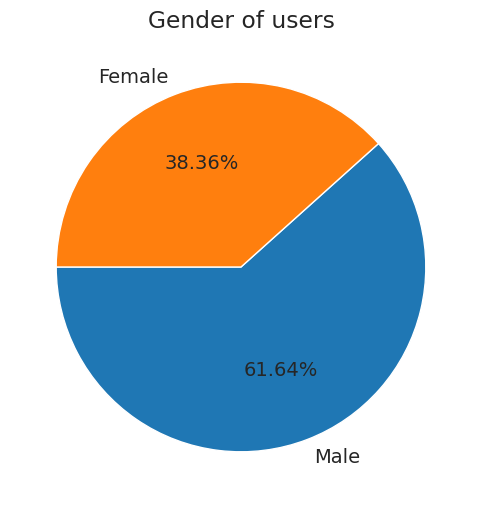

In [ ]:
gender_per =  gender/ len(df['Gender']) * 100

plt.figure(figsize=(12,6))
plt.title('Gender of users')
plt.pie(gender_per, labels= gender_per.index, autopct='%1.2f%%', startangle=180);

## Age of the users

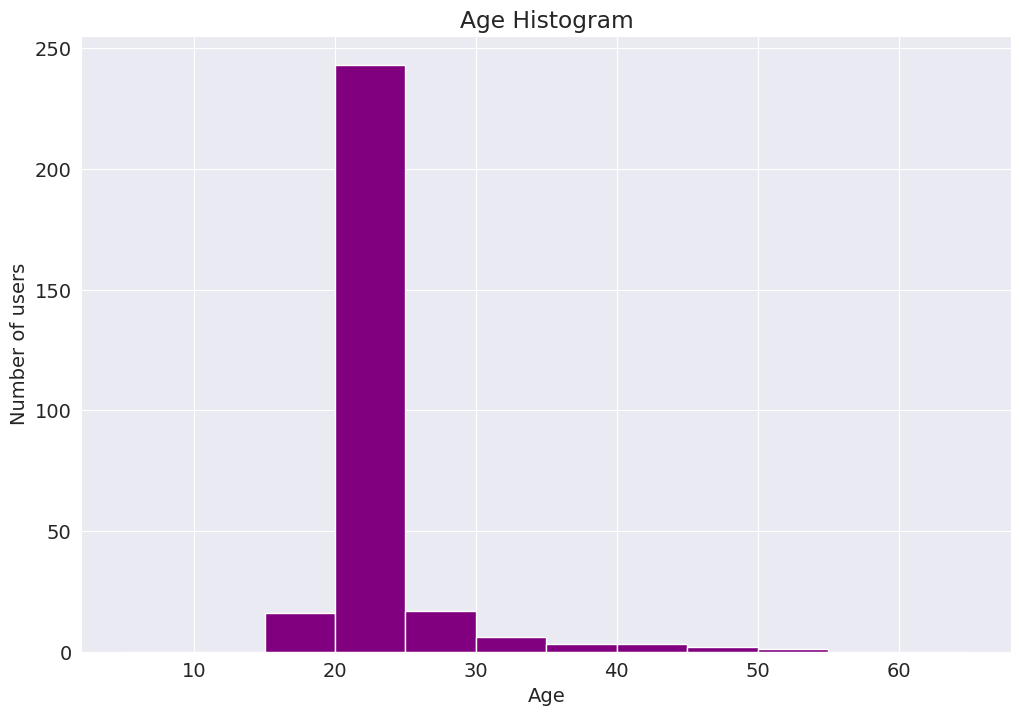

In [ ]:
plt.figure(figsize=(12, 8))
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.title('Age Histogram')

plt.hist(df['Age'], np.arange(5,70,5), color='purple');

In [ ]:
age = df[df['Age'].between(20,25)]
len(age)

253

##Mobile phone brand of users

In [ ]:
brand = df['Mobile Phone Brand'].value_counts()
brand

Apple       60
Samsung     59
Realme      51
Xiaomi      44
Oneplus     36
OPPO        11
Vivo        11
Poco         7
Other        7
Motorola     5
Nokia        1
Name: Mobile Phone Brand, dtype: int64

In [ ]:
(df['Mobile Phone Brand'].value_counts(normalize=True) * 100).round(1)

Apple       20.5
Samsung     20.2
Realme      17.5
Xiaomi      15.1
Oneplus     12.3
OPPO         3.8
Vivo         3.8
Poco         2.4
Other        2.4
Motorola     1.7
Nokia        0.3
Name: Mobile Phone Brand, dtype: float64

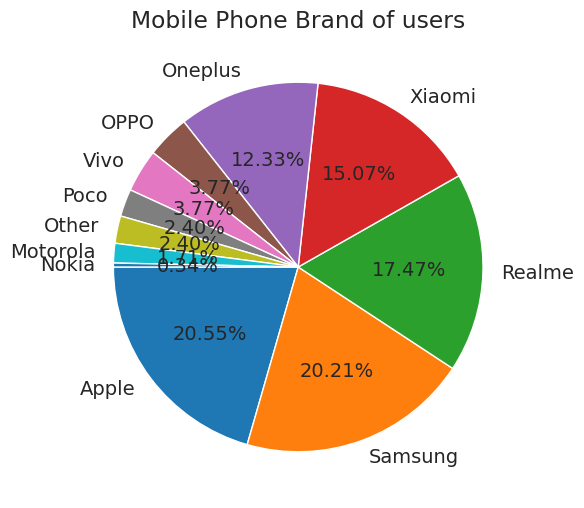

In [ ]:
brand_per =  brand/ len(df['Mobile Phone Brand']) * 100

plt.figure(figsize=(12,6))
plt.title('Mobile Phone Brand of users')
plt.pie(brand_per, labels= brand_per.index, autopct='%1.2f%%', startangle=180);

##Mobile usage habit

In [ ]:
(df['Mobile Phone Usage (in hours)'].value_counts(normalize=True) * 100).round(1)

between 4 and 6     33.2
between 2 and 4     29.5
between 6 and 8     17.8
between 8 and 10    12.3
less than 2          7.2
Name: Mobile Phone Usage (in hours), dtype: float64

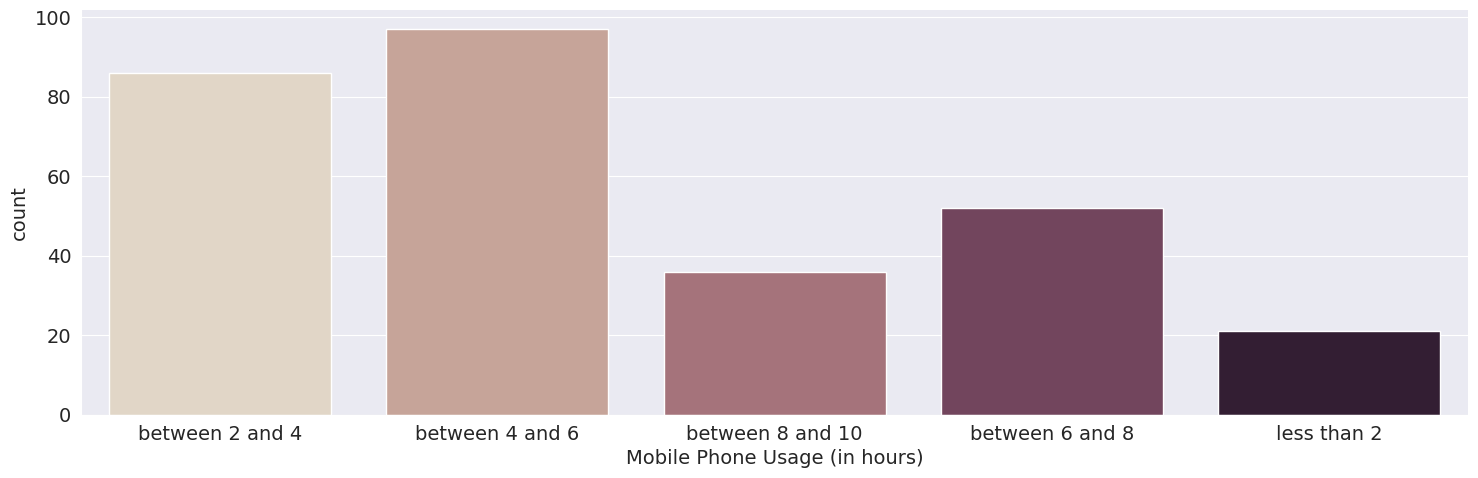

In [ ]:
sns.catplot(x='Mobile Phone Usage (in hours)', kind="count", palette="ch:.25", data= df, aspect=3)

In [ ]:
(df['Average time spent over calling (in a day)'].value_counts(normalize=True) * 100).round(1)

30 minute            28.8
15 minutes           20.9
1 hour               19.5
5 minutes            16.1
2 hour                7.2
more than 2 hours     5.5
not at all            2.1
Name: Average time spent over calling (in a day), dtype: float64

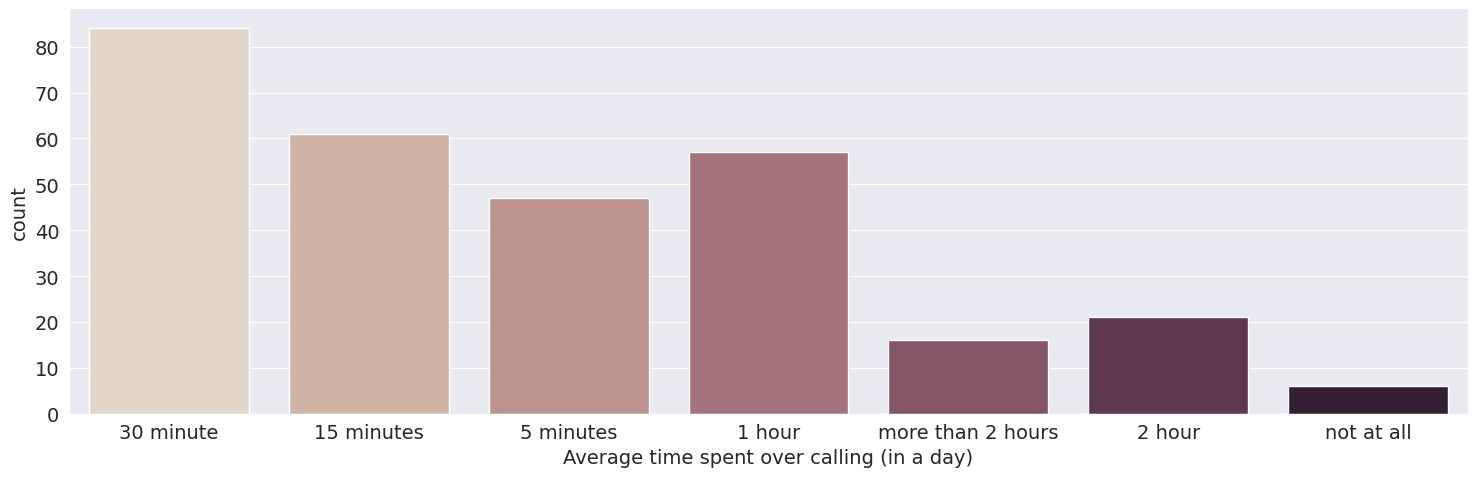

In [ ]:
sns.catplot(x='Average time spent over calling (in a day)', kind="count", palette="ch:.25", data= df, aspect=3)

In [ ]:
(df['Average time spent in gaming (in a day)'].value_counts(normalize=True) * 100).round(1)

not at all           59.2
10 minutes           14.0
20 minutes            8.6
1 hour                7.5
30 minutes            5.5
more than 2 hours     2.7
2 hours               1.4
1.5 hours             1.0
Name: Average time spent in gaming (in a day), dtype: float64

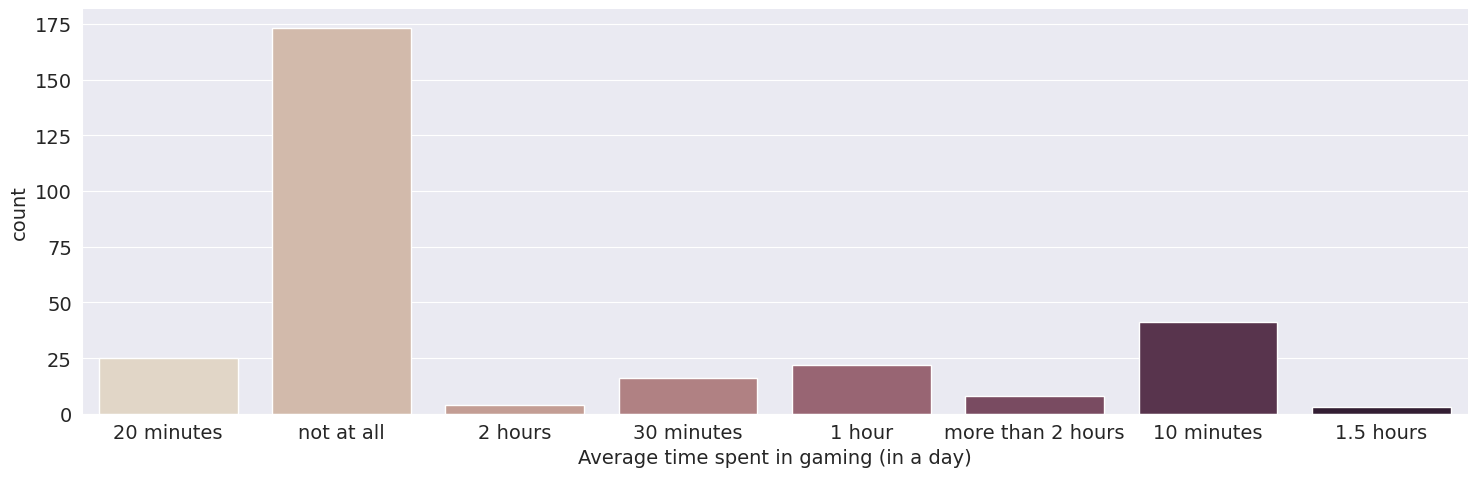

In [ ]:
sns.catplot(x='Average time spent in gaming (in a day)', kind="count", palette="ch:.25", data= df, aspect=3)

In [ ]:
(df['Average time spent on Social Media (in a day)'].value_counts(normalize=True) * 100).round(1)

1 hour               32.5
2 hours              22.9
30 minutes           12.7
20 minutes           11.6
4 hours               8.2
more than 4 hours     4.8
10 minutes            3.4
5 minutes             2.1
not at all            1.7
Name: Average time spent on Social Media (in a day), dtype: float64

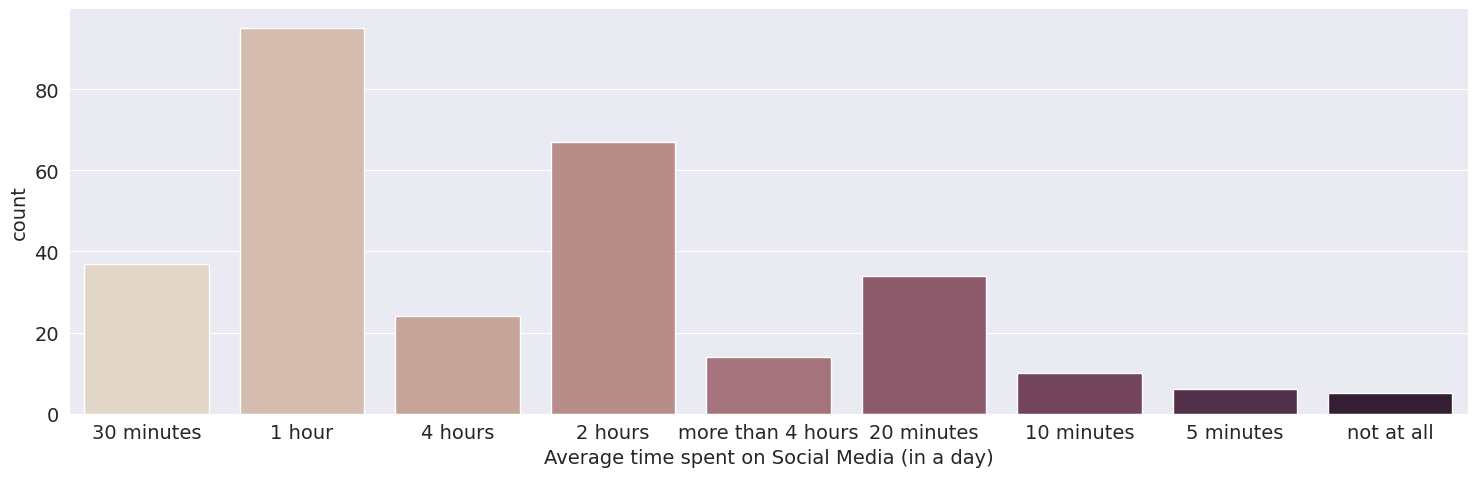

In [ ]:
sns.catplot(x='Average time spent on Social Media (in a day)', kind="count", palette="ch:.25", data= df, aspect=3)

In [ ]:
(df['Average time spent playing videos (in a day)'].value_counts(normalize=True) * 100).round(1)

1 hour        24.3
2 hours       19.5
30 minutes    19.2
not at all    19.2
15 minutes    10.6
4 hours        5.8
6 hours        1.4
Name: Average time spent playing videos (in a day), dtype: float64

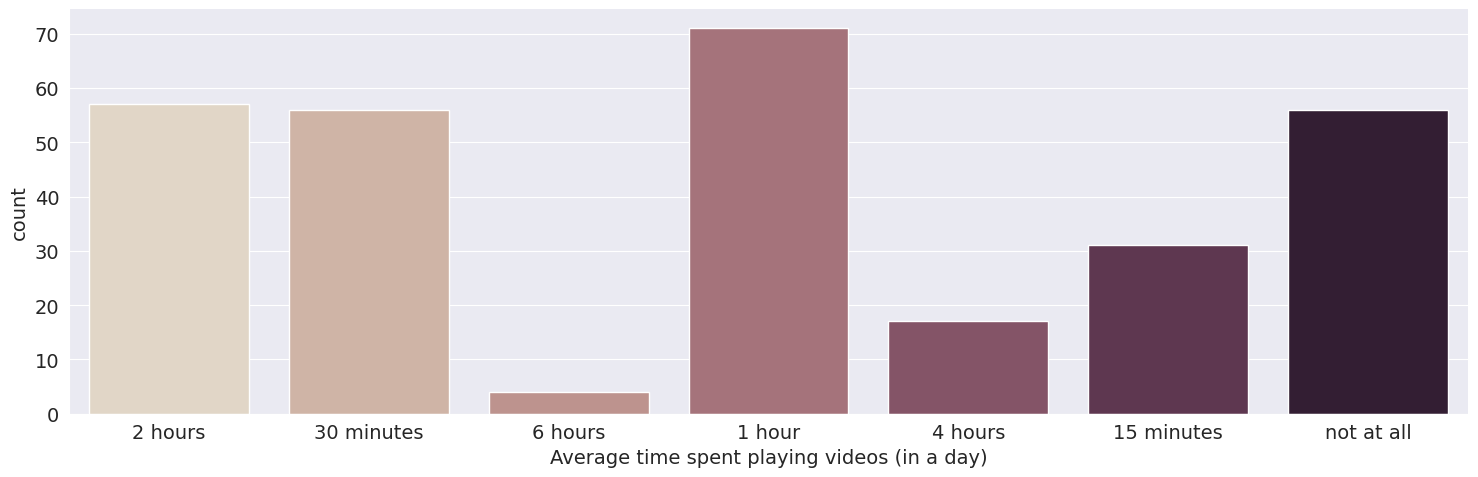

In [ ]:
sns.catplot(x='Average time spent playing videos (in a day)', kind="count", palette="ch:.25", data= df, aspect=3)

In [ ]:
(df['Average time spent in productive work (in a day)'].value_counts(normalize=True) * 100).round(1)

1 hour or more    67.5
30 minutes        20.9
15 minutes         6.8
not at all         4.8
Name: Average time spent in productive work (in a day), dtype: float64

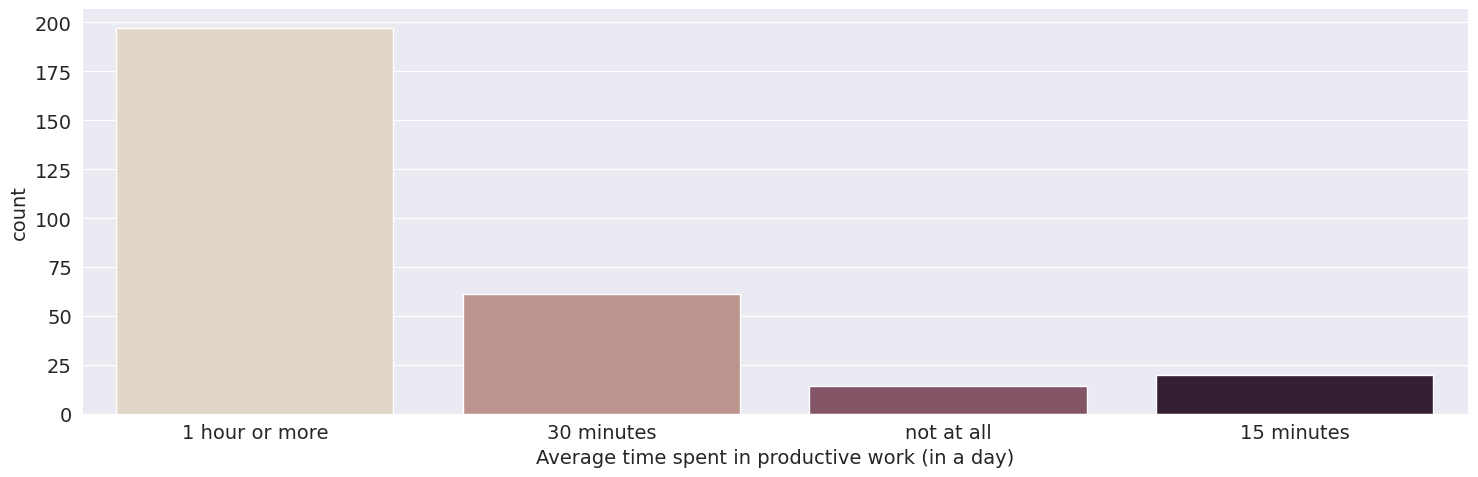

In [ ]:
sns.catplot(x='Average time spent in productive work (in a day)', kind="count", palette="ch:.25", data= df, aspect=3)

###Screen Brightness Level

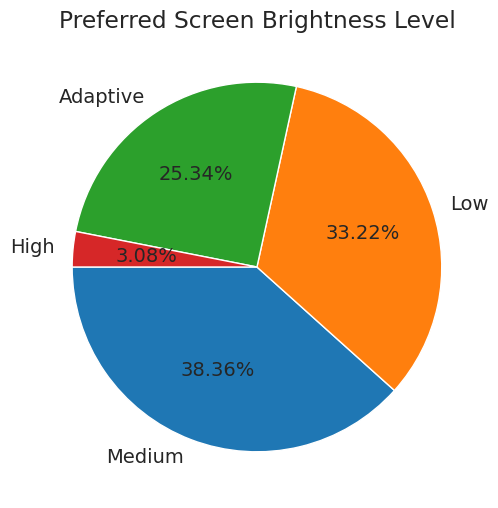

In [ ]:
b = df['Preferred Screen Brightness Level'].value_counts()
b_per =  b/ len(df['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Preferred Screen Brightness Level')
plt.pie(b_per, labels= b_per.index, autopct='%1.2f%%', startangle=180);

###Preferred Alert Mode

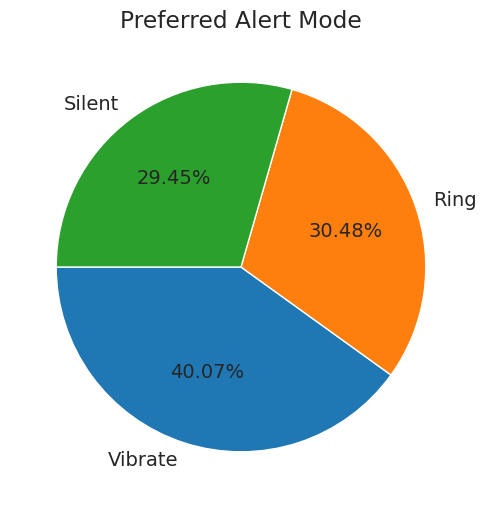

In [ ]:
a = df['Preferred Alert Mode'].value_counts()
a_per =  a/ len(df['Preferred Alert Mode']) * 100

plt.figure(figsize=(12,6))
plt.title('Preferred Alert Mode')
plt.pie(a_per, labels= a_per.index, autopct='%1.2f%%', startangle=180);

###Use of mobile phones just before going to bed

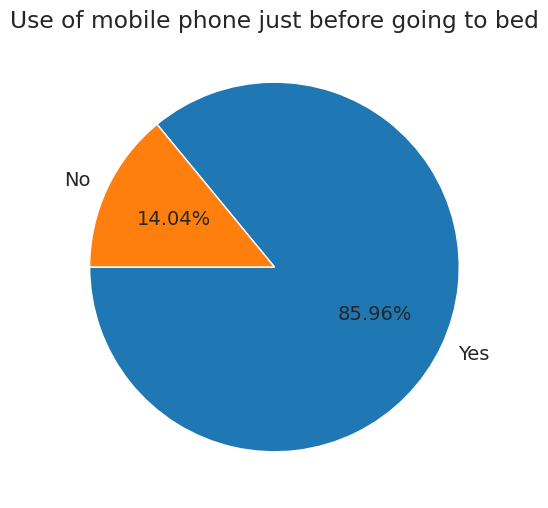

In [ ]:
t = df['Do you use your mobile just before going to bed?'].value_counts()
t_per =  t/ len(df['Do you use your mobile just before going to bed?']) * 100

plt.figure(figsize=(12,6))
plt.title('Use of mobile phone just before going to bed')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

###Use of mobile phone just after waking up

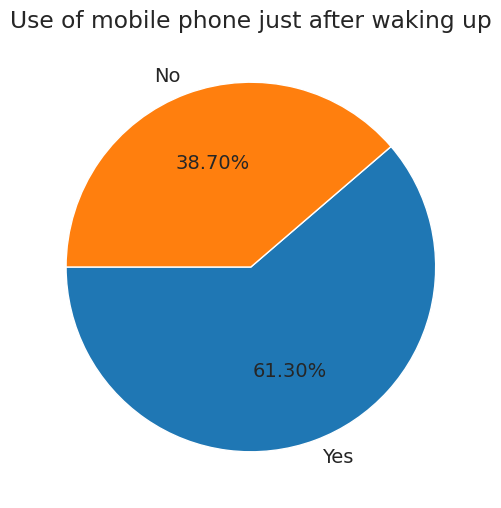

In [ ]:
t = df['Do you use your mobile phone just after waking up?'].value_counts()
t_per =  t/ len(df['Do you use your mobile phone just after waking up?']) * 100

plt.figure(figsize=(12,6))
plt.title('Use of mobile phone just after waking up')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

###Place to keep mobile phones

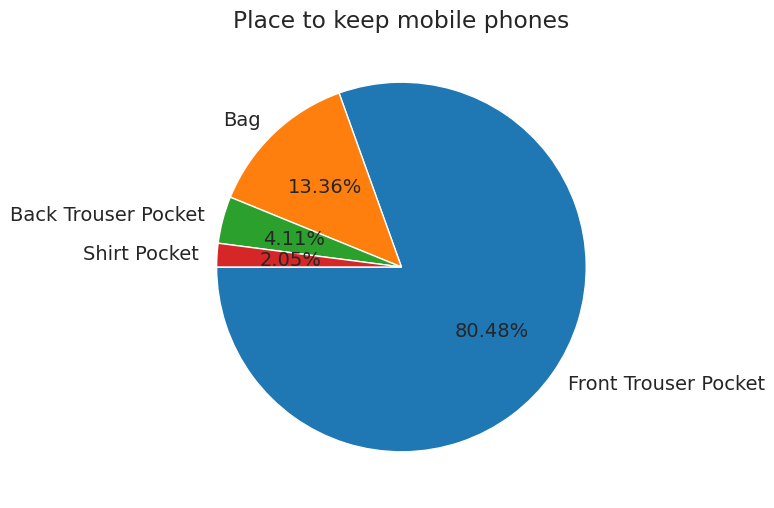

In [ ]:
t = df['Where do you generally keep your phone?'].value_counts()
t_per =  t/ len(df['Where do you generally keep your phone?']) * 100

plt.figure(figsize=(12,6))
plt.title('Place to keep mobile phones')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

In [ ]:
df['Any recurring health issues (choose all that apply)'].value_counts()

None                                                                                                                          142
Eyes strain                                                                                                                    22
Headache                                                                                                                       22
Headache, Eyes strain                                                                                                           9
Sleeplessness                                                                                                                   5
                                                                                                                             ... 
Headache, hair fall                                                                                                             1
Earache, Eyes strain, Sleeplessness                                                       

In [ ]:
health_issues = ['Headache',
'Earache',
'Eyes strain',
'Hand or Neck pain',
'Impulsiveness',
'Sleeplessness',
'Hypertension',
'Dizziness',
'Fatigue',
]

##Do you have some health issues

In [ ]:
h = df['Health Issues'].value_counts()
h

Yes    150
No     142
Name: Health Issues, dtype: int64

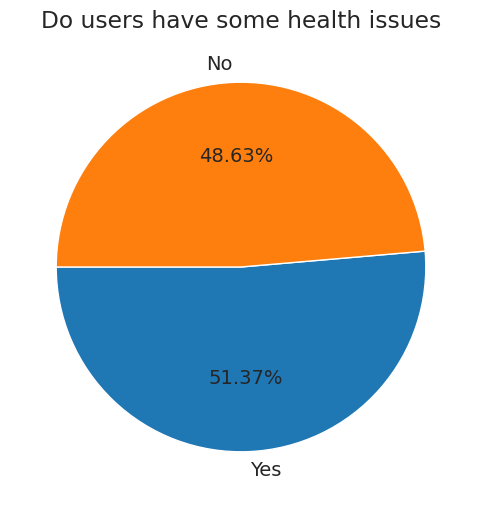

In [ ]:
h_per =  h/ len(df['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Do users have some health issues')
plt.pie(h_per, labels= h_per.index, autopct='%1.2f%%', startangle=180);

##Mojor health issues

In [ ]:
h_df.sum()

Headache             75
Earache               7
Eyes strain          78
Hand or Neck pain    43
Impulsiveness        11
Sleeplessness        35
Hypertension         18
Dizziness            19
Fatigue              35
dtype: int64

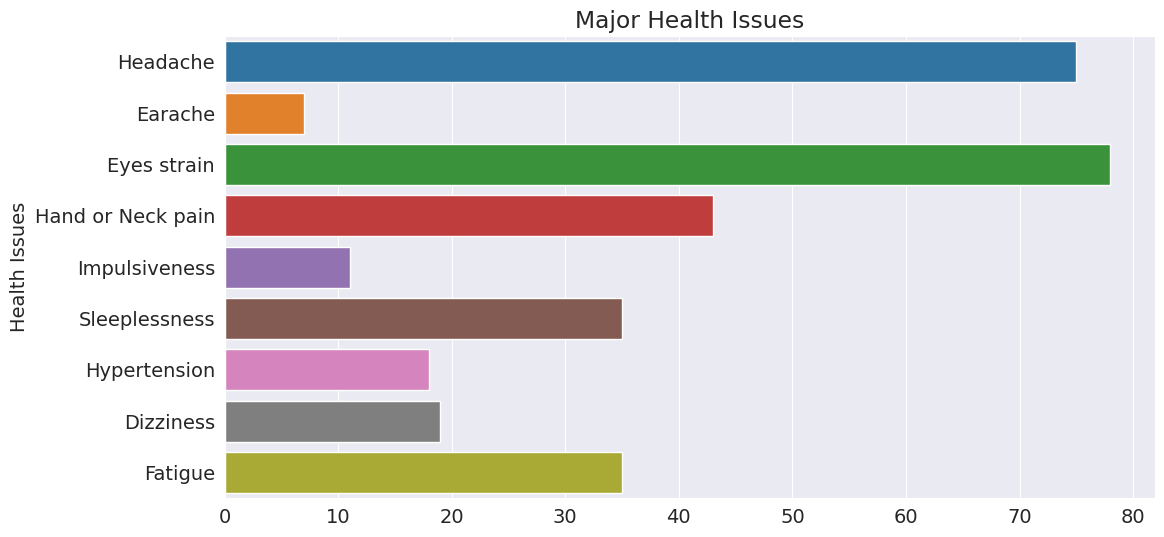

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Major Health Issues")
plt.ylabel('Health Issues');
sns.barplot(x=h_df.sum(), y=h_df.sum().index);

##Preferred posture while using mobile

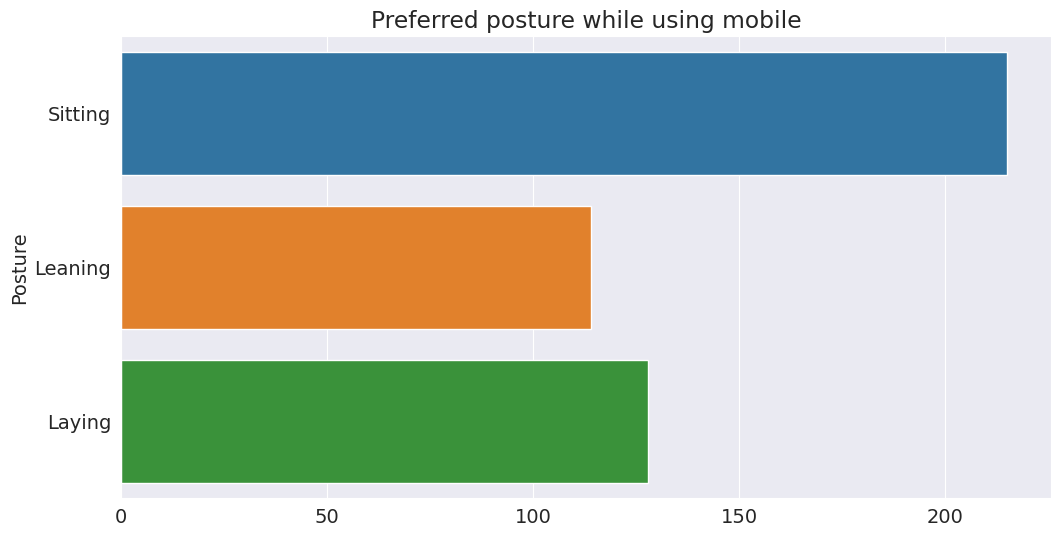

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Preferred posture while using mobile")
plt.ylabel('Posture');
sns.barplot(x=p_df.sum(), y=p_df.sum().index);

##SAR Head W/kg(1g)

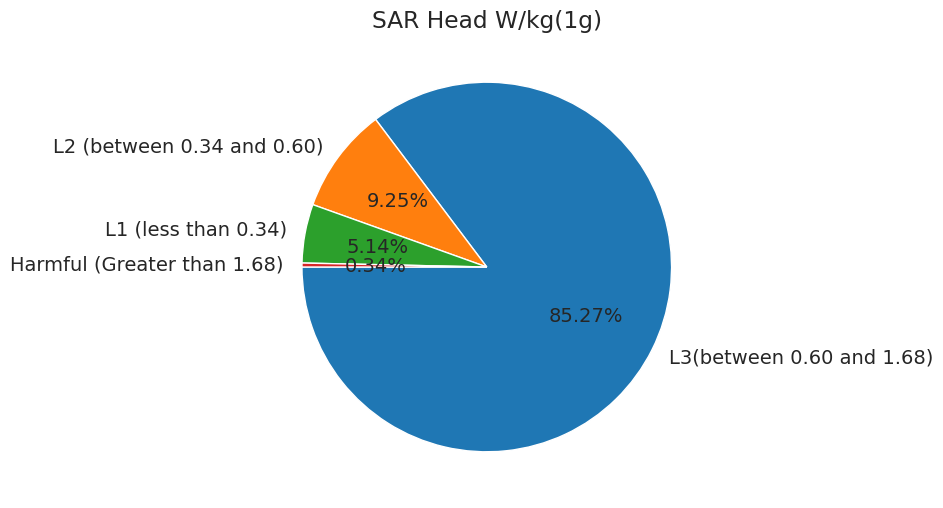

In [ ]:
t = df['Head'].value_counts()
t_per =  t/ len(df['Head']) * 100

plt.figure(figsize=(12,6))
plt.title('SAR Head W/kg(1g)')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

##SAR Body W/kg(1g)

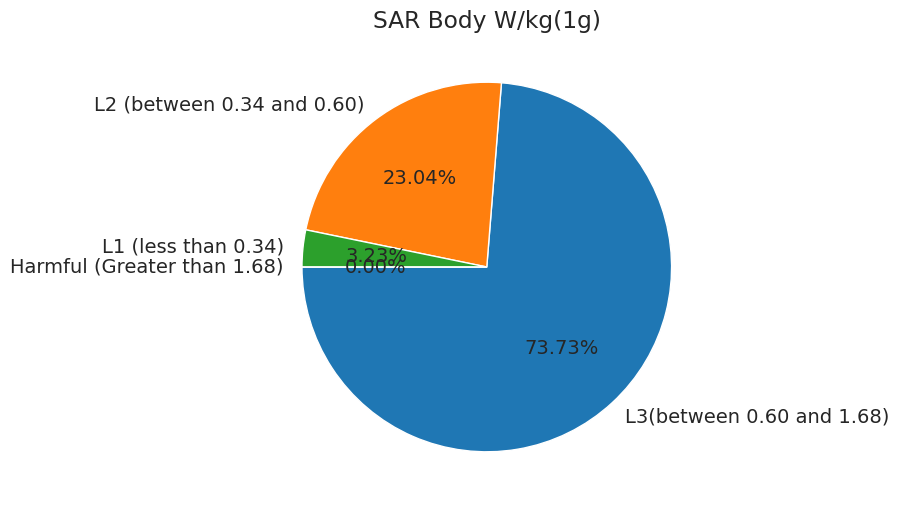

In [ ]:
t = df['Body'].value_counts()
t_per =  t/ len(df['Body']) * 100

plt.figure(figsize=(12,6))
plt.title('SAR Body W/kg(1g)')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

##Frequency of SAR Head levels

In [ ]:
cov_counts = df.groupby(['Mobile Phone Brand', 'Head']).size()
cov_counts = cov_counts.reset_index(name = 'Count')
cov_counts = cov_counts.pivot(index = 'Mobile Phone Brand', columns = 'Head', values = 'Count')
cov_counts

Head                L1 (less than 0.34)  L2 (between 0.34 and 0.60)  \
Mobile Phone Brand                                                    
Apple                                 0                           0   
Motorola                              0                           0   
Nokia                                 0                           0   
OPPO                                  0                           0   
Oneplus                               0                           1   
Other                                 0                           0   
Poco                                  0                           0   
Realme                                0                           0   
Samsung                              11                          23   
Vivo                                  0                           1   
Xiaomi                                4                           2   

Head                L3(between 0.60 and 1.68)  Harmful (Greater than 1.68)  
Mobile Phone Brand                                                          
Apple                                      60                            0  
Motorola                                    5                            0  
Nokia                                       1                            0  
OPPO                                       11                            0  
Oneplus                                    35                            0  
Other                                       7                            0  
Poco                                        7                            0  
Realme                                     51                            0  
Samsung                                    25                            0  
Vivo                                       10                            0  
Xiaomi                                     37                            1

##Range of SAR Head of various Mobile Phone Brand

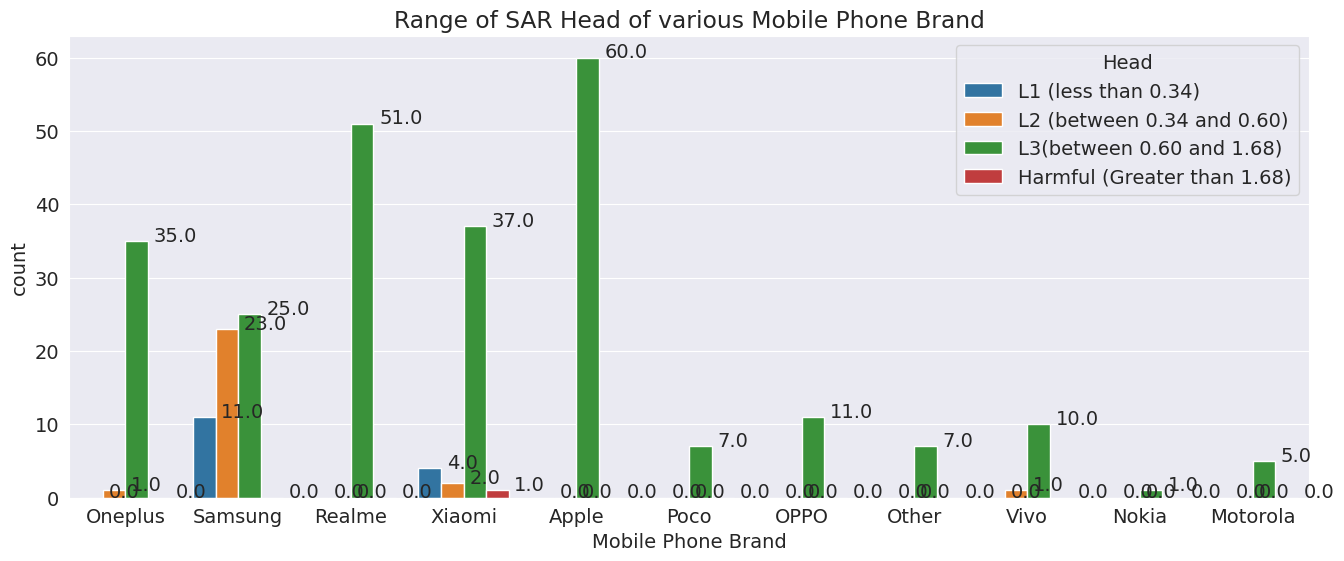

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Mobile Phone Brand',hue='Head', data= df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Range of SAR Head of various Mobile Phone Brand')
plt.xlabel('Mobile Phone Brand');

<Axes: xlabel='Head', ylabel='Mobile Phone Brand'>

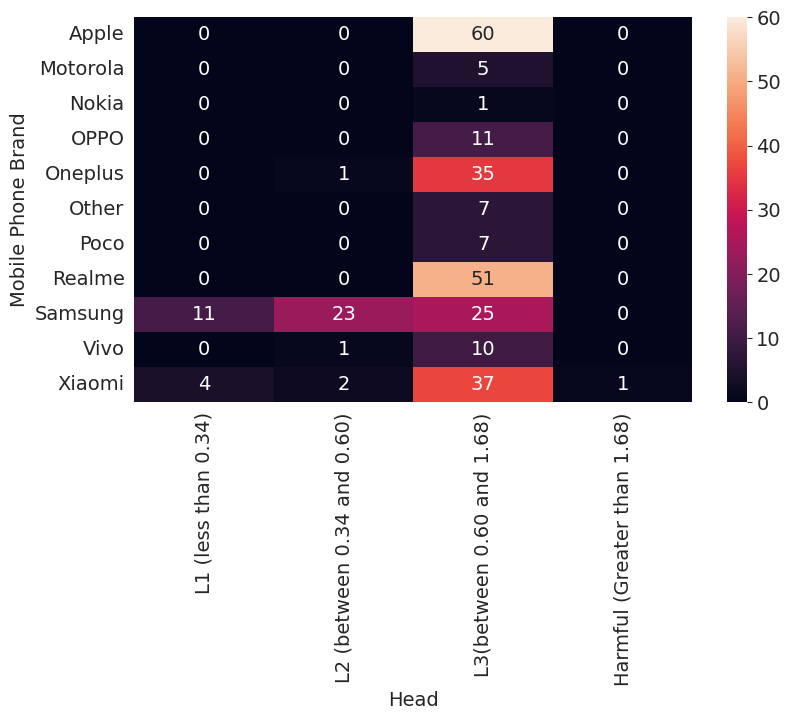

In [ ]:
sns.heatmap(cov_counts, annot = True, fmt = '.0f')

##Range of SAR Body of various Mobile Phone Brand

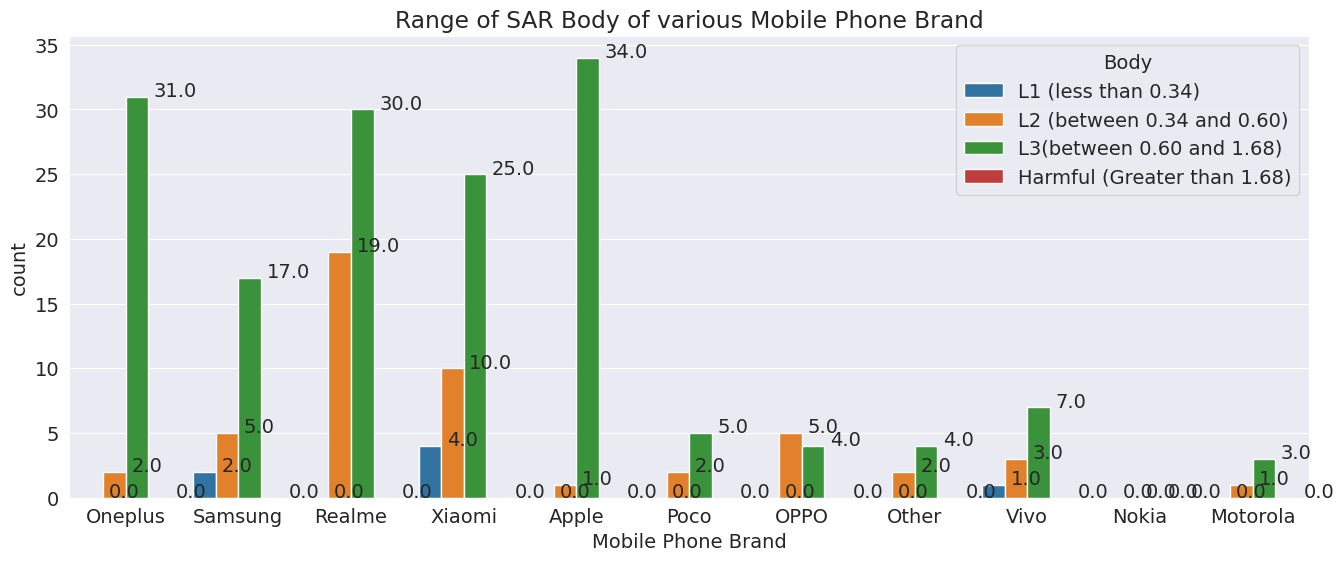

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Mobile Phone Brand',hue='Body', data= df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Range of SAR Body of various Mobile Phone Brand')
plt.xlabel('Mobile Phone Brand');

##Health Issues based on Gender

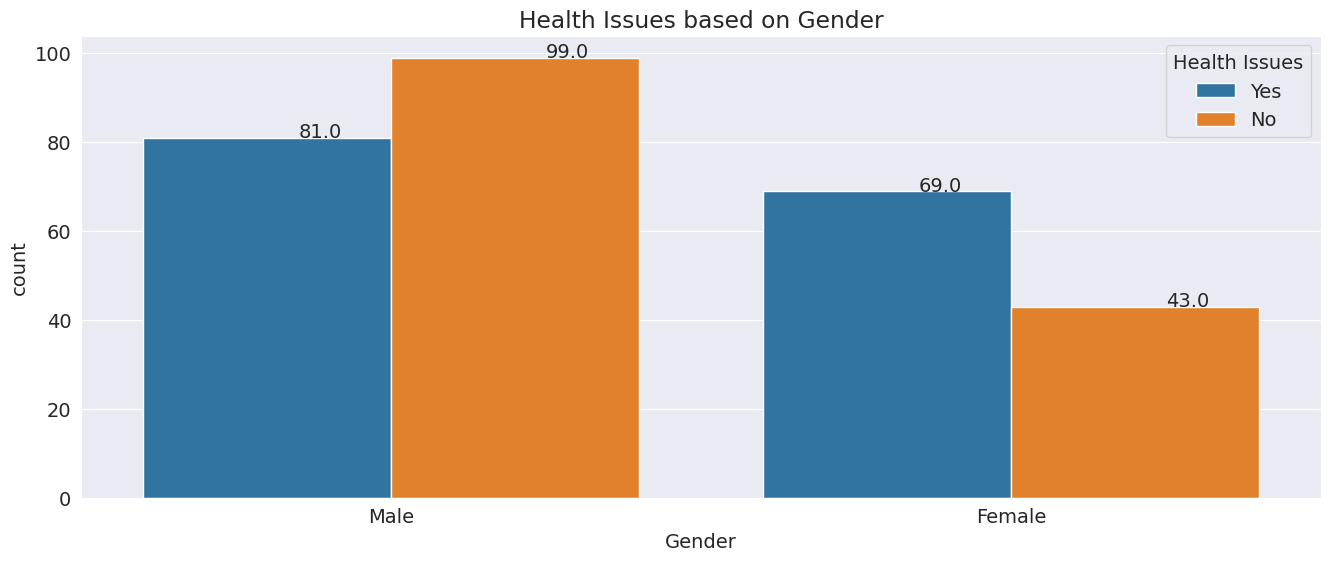

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Gender',hue='Health Issues', data= df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Health Issues based on Gender')
plt.xlabel('Gender');

##Wear spectacles based on time on social media

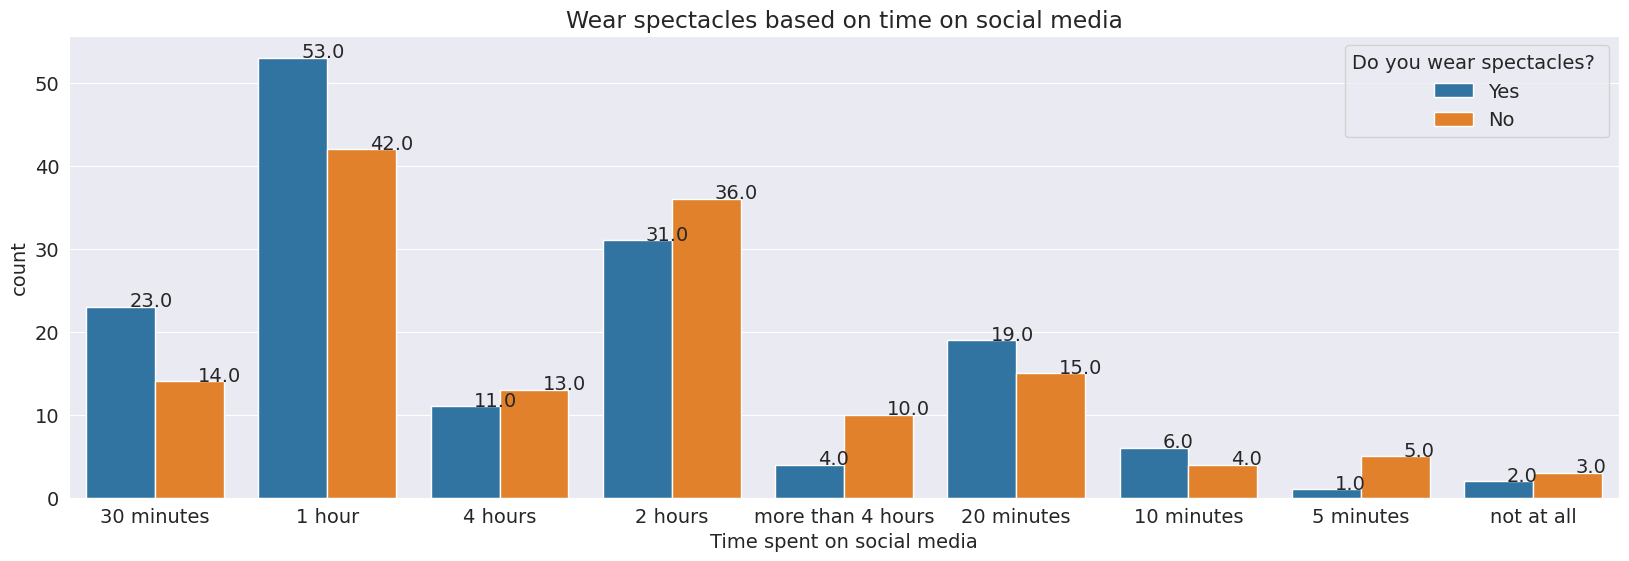

In [ ]:
plt.figure(figsize=(20,6))
ax= sns.countplot(x= 'Average time spent on Social Media (in a day)',hue='Do you wear spectacles? ', data= df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Wear spectacles based on time on social media')
plt.xlabel('Time spent on social media');

In [ ]:
c_df=df.copy()

c_df['Headache']=c_df['Headache'].replace([0,1],['No','Yes'])
c_df['Earache']=c_df['Earache'].replace([0,1],['No','Yes'])
c_df['Eyes strain']=c_df['Eyes strain'].replace([0,1],['No','Yes'])
c_df['Hand or Neck pain']=c_df['Hand or Neck pain'].replace([0,1],['No','Yes'])
c_df['Impulsiveness']=c_df['Impulsiveness'].replace([0,1],['No','Yes'])
c_df['Sleeplessness']=c_df['Sleeplessness'].replace([0,1],['No','Yes'])
c_df['Hypertension']=c_df['Hypertension'].replace([0,1],['No','Yes'])
c_df['Dizziness']=c_df['Dizziness'].replace([0,1],['No','Yes'])
c_df['Fatigue']=c_df['Fatigue'].replace([0,1],['No','Yes'])

c_df.iloc[:,50:59]

Headache Earache Eyes strain Hand or Neck pain Impulsiveness  \
0         No      No          No                No            No   
1         No      No          No               Yes           Yes   
2         No      No          No                No            No   
3         No      No          No                No            No   
4        Yes     Yes         Yes                No            No   
..       ...     ...         ...               ...           ...   
287      Yes      No         Yes                No            No   
288       No      No          No                No            No   
289       No      No          No                No            No   
290       No      No          No                No            No   
291       No      No         Yes                No            No   

    Sleeplessness Hypertension Dizziness Fatigue  
0             Yes           No        No      No  
1              No           No        No      No  
2              No           No        No      No  
3              No           No        No      No  
4             Yes           No        No      No  
..            ...          ...       ...     ...  
287           Yes           No        No      No  
288            No           No        No      No  
289            No           No        No      No  
290            No           No        No      No  
291            No           No        No      No  

[292 rows x 9 columns]

##Eyes Strain based on Screen Brightness

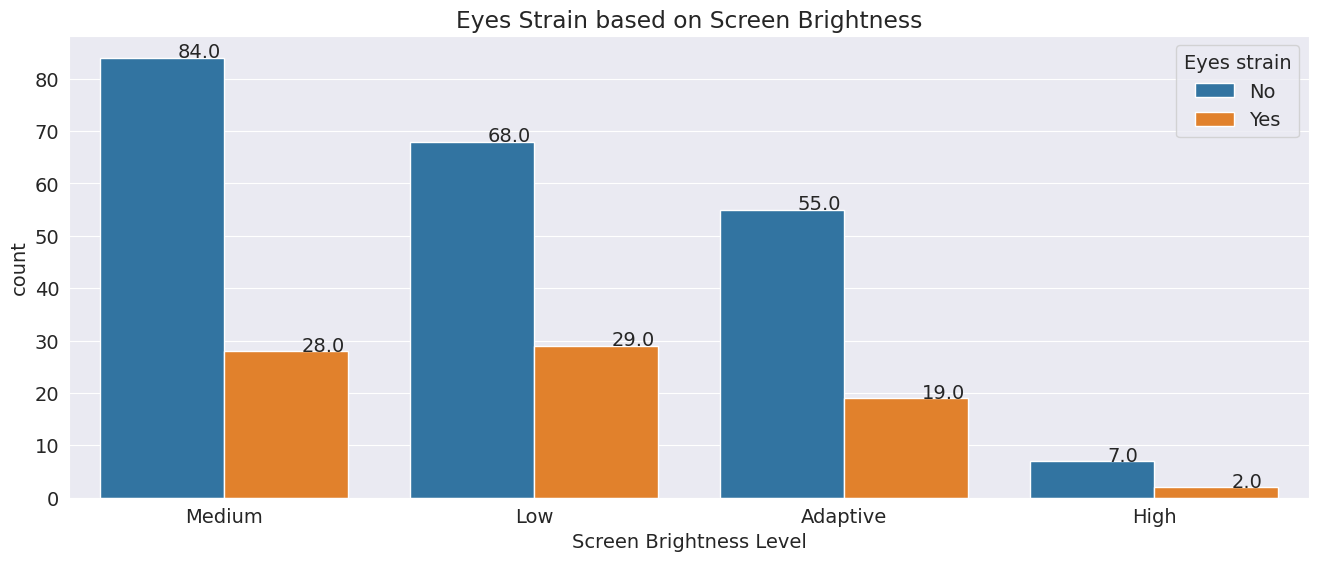

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Preferred Screen Brightness Level',hue='Eyes strain', data= c_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Eyes Strain based on Screen Brightness')
plt.xlabel('Screen Brightness Level');

##Headache based on mobile theme

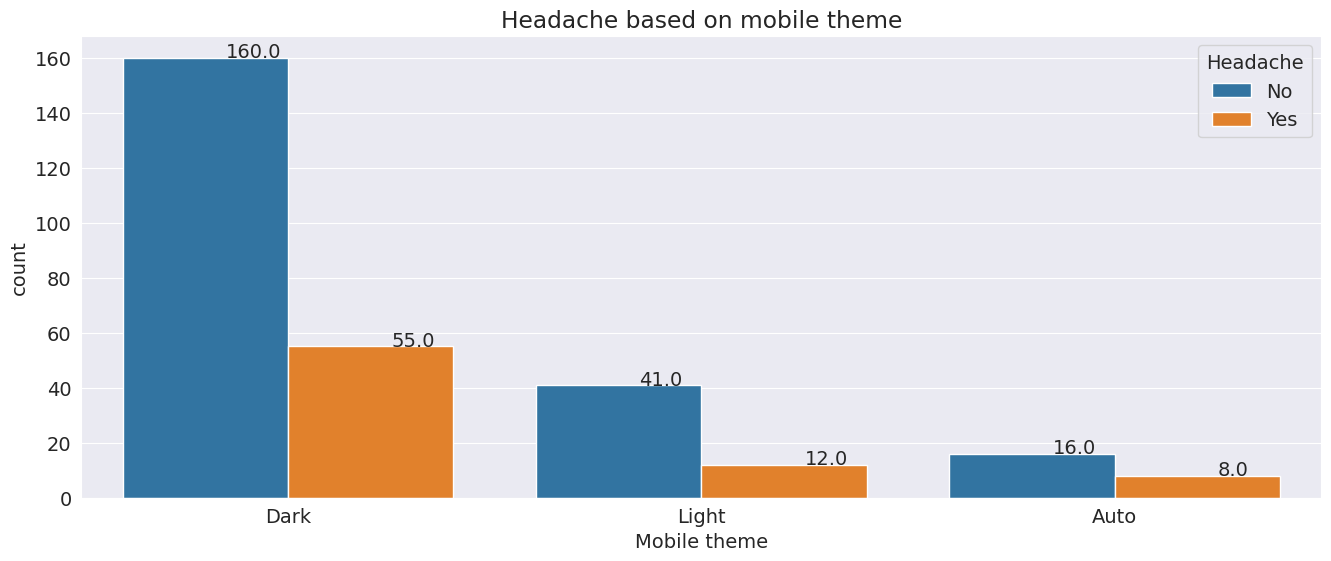

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Preferred theme',hue='Headache', data= c_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Headache based on mobile theme')
plt.xlabel('Mobile theme');

##Eyes strain based on bistance between eyes and screen

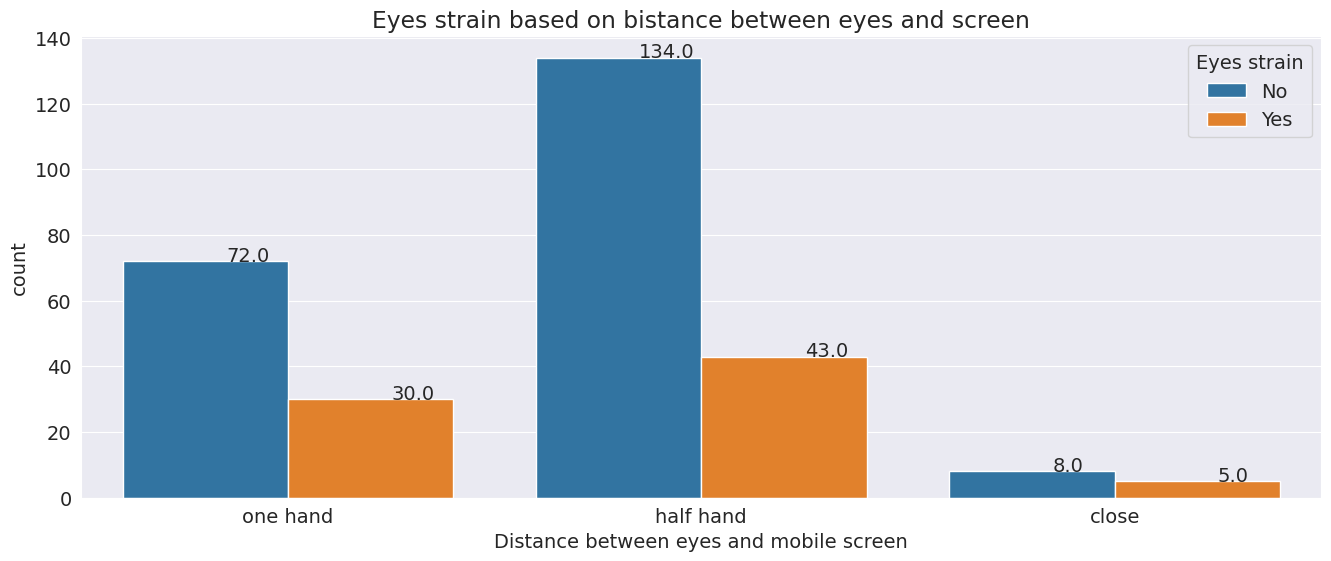

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Distance between eyes and mobile screen while using',hue='Eyes strain', data= c_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Eyes strain based on bistance between eyes and screen')
plt.xlabel('Distance between eyes and mobile screen');

##Headache based on low light condition

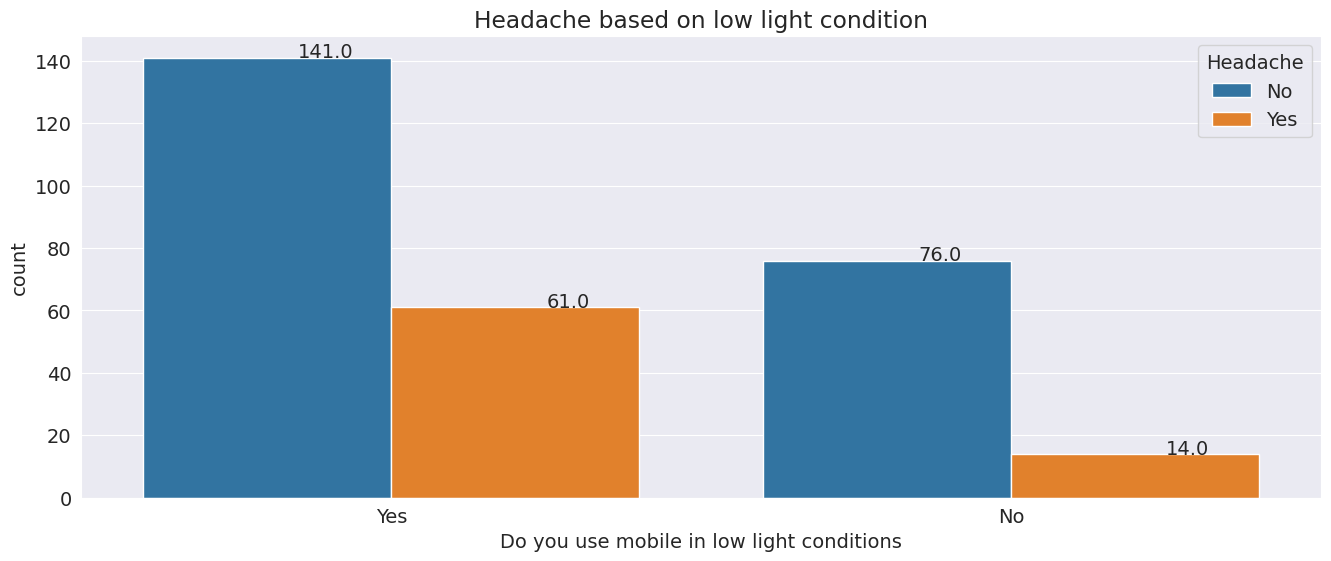

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Do you use your mobile in low light conditions?',hue='Headache', data= c_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Headache based on low light condition')
plt.xlabel('Do you use mobile in low light conditions');

##Sleeplessness based on mobile phone placed while sleeping

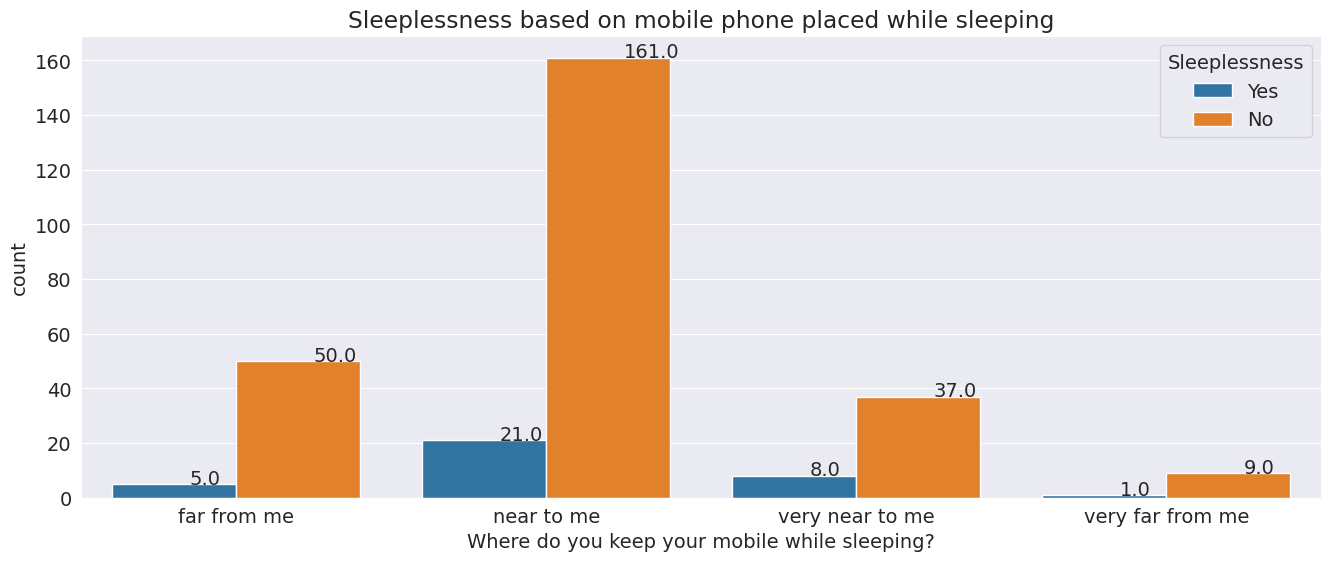

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Where do you keep your mobile while sleeping?',hue='Sleeplessness', data= c_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Sleeplessness based on mobile phone placed while sleeping')
plt.xlabel('Where do you keep your mobile while sleeping?');

##Use of mobile before bed based on duration of time spent on social media

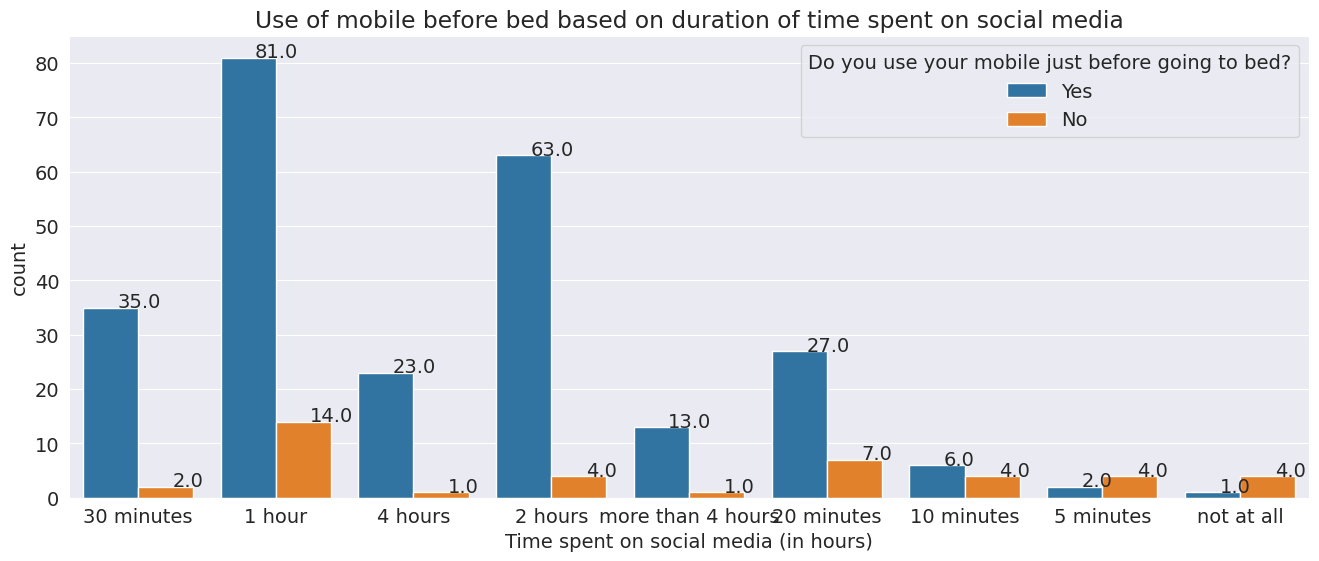

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Average time spent on Social Media (in a day)',hue='Do you use your mobile just before going to bed?', data= c_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Use of mobile before bed based on duration of time spent on social media')
plt.xlabel('Time spent on social media (in hours)');

##Wear spectacles based on screen brightness level

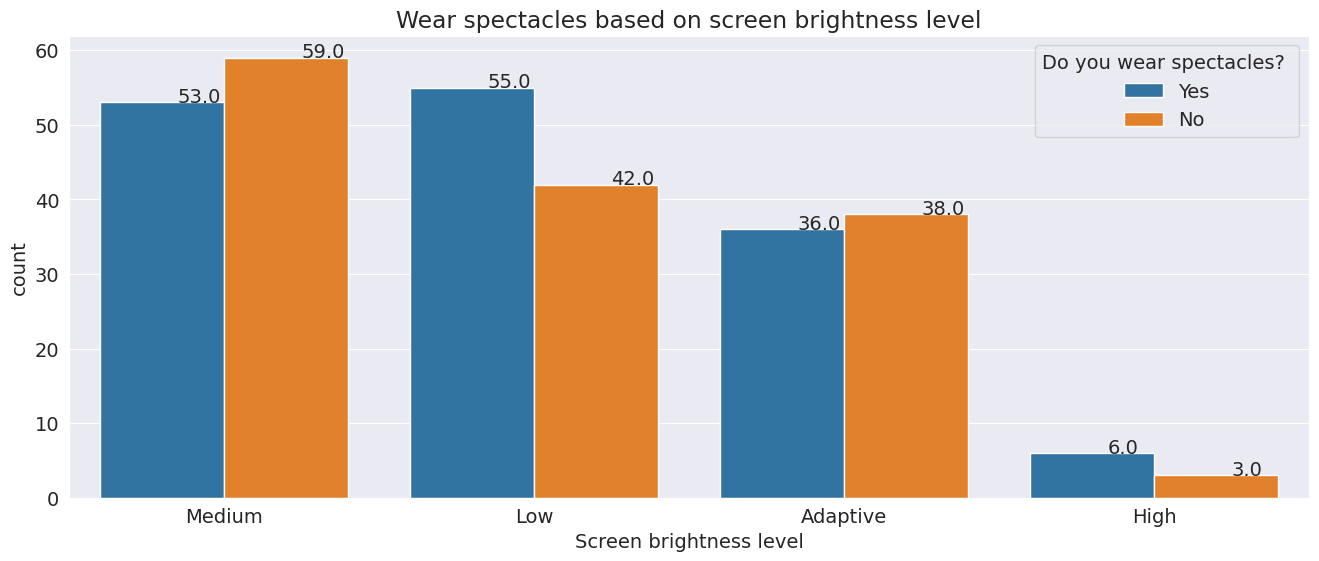

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Preferred Screen Brightness Level',hue='Do you wear spectacles? ', data= df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Wear spectacles based on screen brightness level')
plt.xlabel('Screen brightness level');

##Eyes strain based on mobile usage before bed

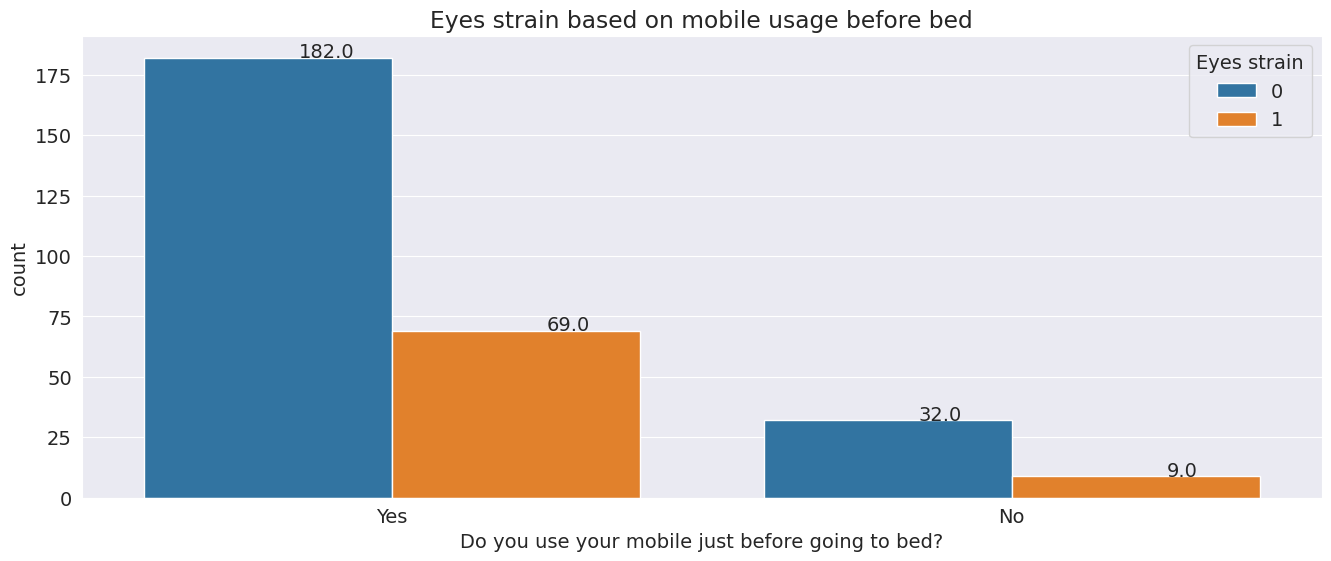

In [ ]:
plt.figure(figsize=(16,6))
ax= sns.countplot(x= 'Do you use your mobile just before going to bed?',hue='Eyes strain', data= df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('Eyes strain based on mobile usage before bed')
plt.xlabel('Do you use your mobile just before going to bed?');

In [ ]:
# h_df=h_df.replace([0,1],['No','Yes'])

In [ ]:
# h_df.head()

In [ ]:
# (pd.crosstab([df['Head'], df['Body']], [h_df['Headache'], h_df['Earache'], h_df['Eyes strain'], h_df['Hand or Neck pain'], h_df['Impulsiveness'], h_df['Sleeplessness'], h_df['Hypertension'], h_df['Dizziness'], h_df['Fatigue']], normalize= 'index') * 100).round(1)

##Crosstab visualization of health issues with mobile phone use

In [ ]:
(pd.crosstab(df['Health Issues'], df['Mobile Phone Usage (in hours)'], normalize= 'columns') * 100).round(1)

Mobile Phone Usage (in hours)  between 2 and 4  between 4 and 6  \
Health Issues                                                     
No                                        54.7             45.4   
Yes                                       45.3             54.6   

Mobile Phone Usage (in hours)  between 6 and 8  between 8 and 10  less than 2  
Health Issues                                                                  
No                                        55.8              33.3         47.6  
Yes                                       44.2              66.7         52.4

In [ ]:
(pd.crosstab(df['Health Issues'], [df['Do you use your mobile just before going to bed?'], df['Do you use your mobile phone just after waking up?']], normalize= 'columns') * 100).round(1)

Do you use your mobile just before going to bed?      No         Yes      
Do you use your mobile phone just after waking up?    No   Yes    No   Yes
Health Issues                                                             
No                                                  55.6  50.0  55.8  43.6
Yes                                                 44.4  50.0  44.2  56.4

In [ ]:
(pd.crosstab(df['Health Issues'], df['Do you use your mobile in low light conditions?'], normalize= 'columns') * 100).round(1)

Do you use your mobile in low light conditions?    No   Yes
Health Issues                                              
No                                               56.7  45.0
Yes                                              43.3  55.0

##Health issues with top five brands

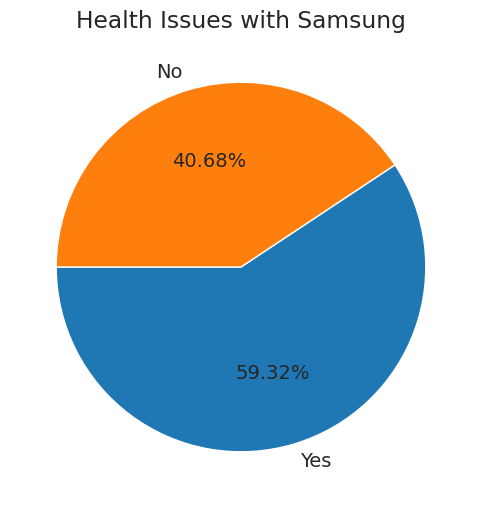

In [ ]:
sur= df[df['Mobile Phone Brand'] == 'Samsung']

t = sur['Health Issues'].value_counts()
t_per =  t/ len(sur['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Health Issues with Samsung')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

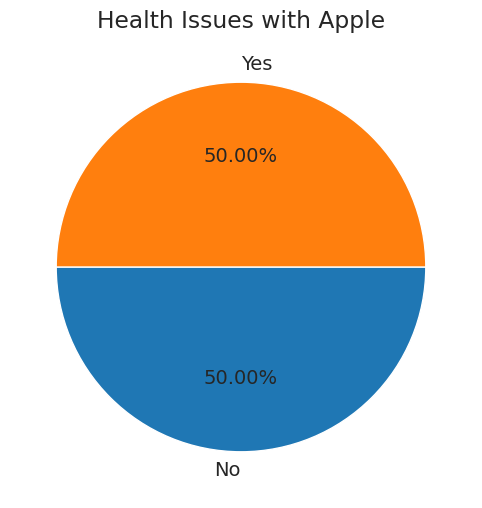

In [ ]:
sur= df[df['Mobile Phone Brand'] == 'Apple']

t = sur['Health Issues'].value_counts()
t_per =  t/ len(sur['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Health Issues with Apple')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

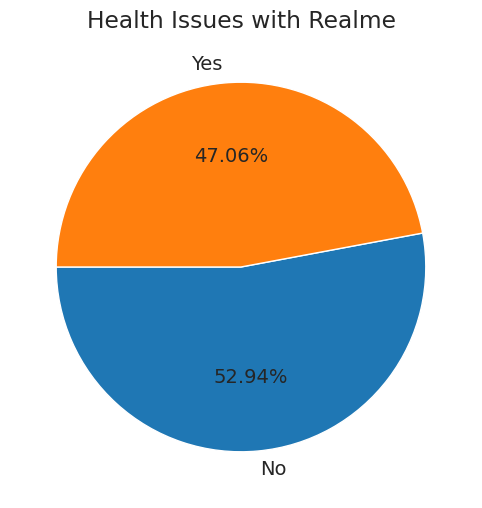

In [ ]:
sur= df[df['Mobile Phone Brand'] == 'Realme']

t = sur['Health Issues'].value_counts()
t_per =  t/ len(sur['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Health Issues with Realme')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

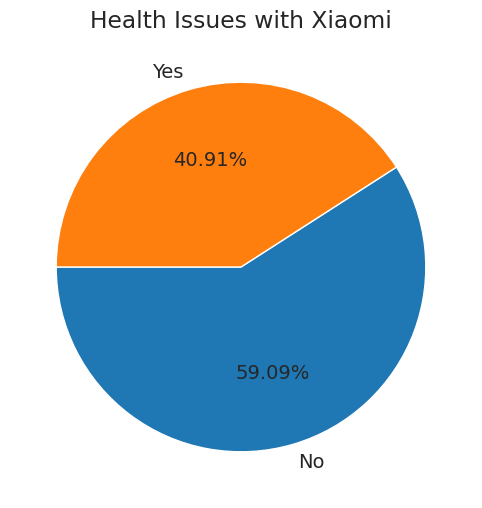

In [ ]:
sur= df[df['Mobile Phone Brand'] == 'Xiaomi']

t = sur['Health Issues'].value_counts()
t_per =  t/ len(sur['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Health Issues with Xiaomi')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

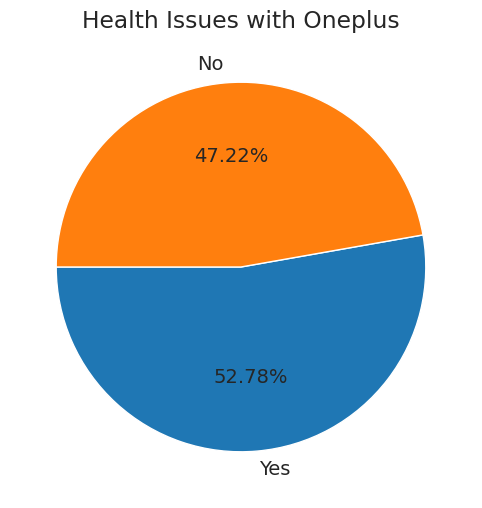

In [ ]:
sur= df[df['Mobile Phone Brand'] == 'Oneplus']

t = sur['Health Issues'].value_counts()
t_per =  t/ len(sur['Health Issues']) * 100

plt.figure(figsize=(12,6))
plt.title('Health Issues with Oneplus')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

# Heatmap to check correlation among other features

<Axes: title={'center': 'Correlation Factor'}>

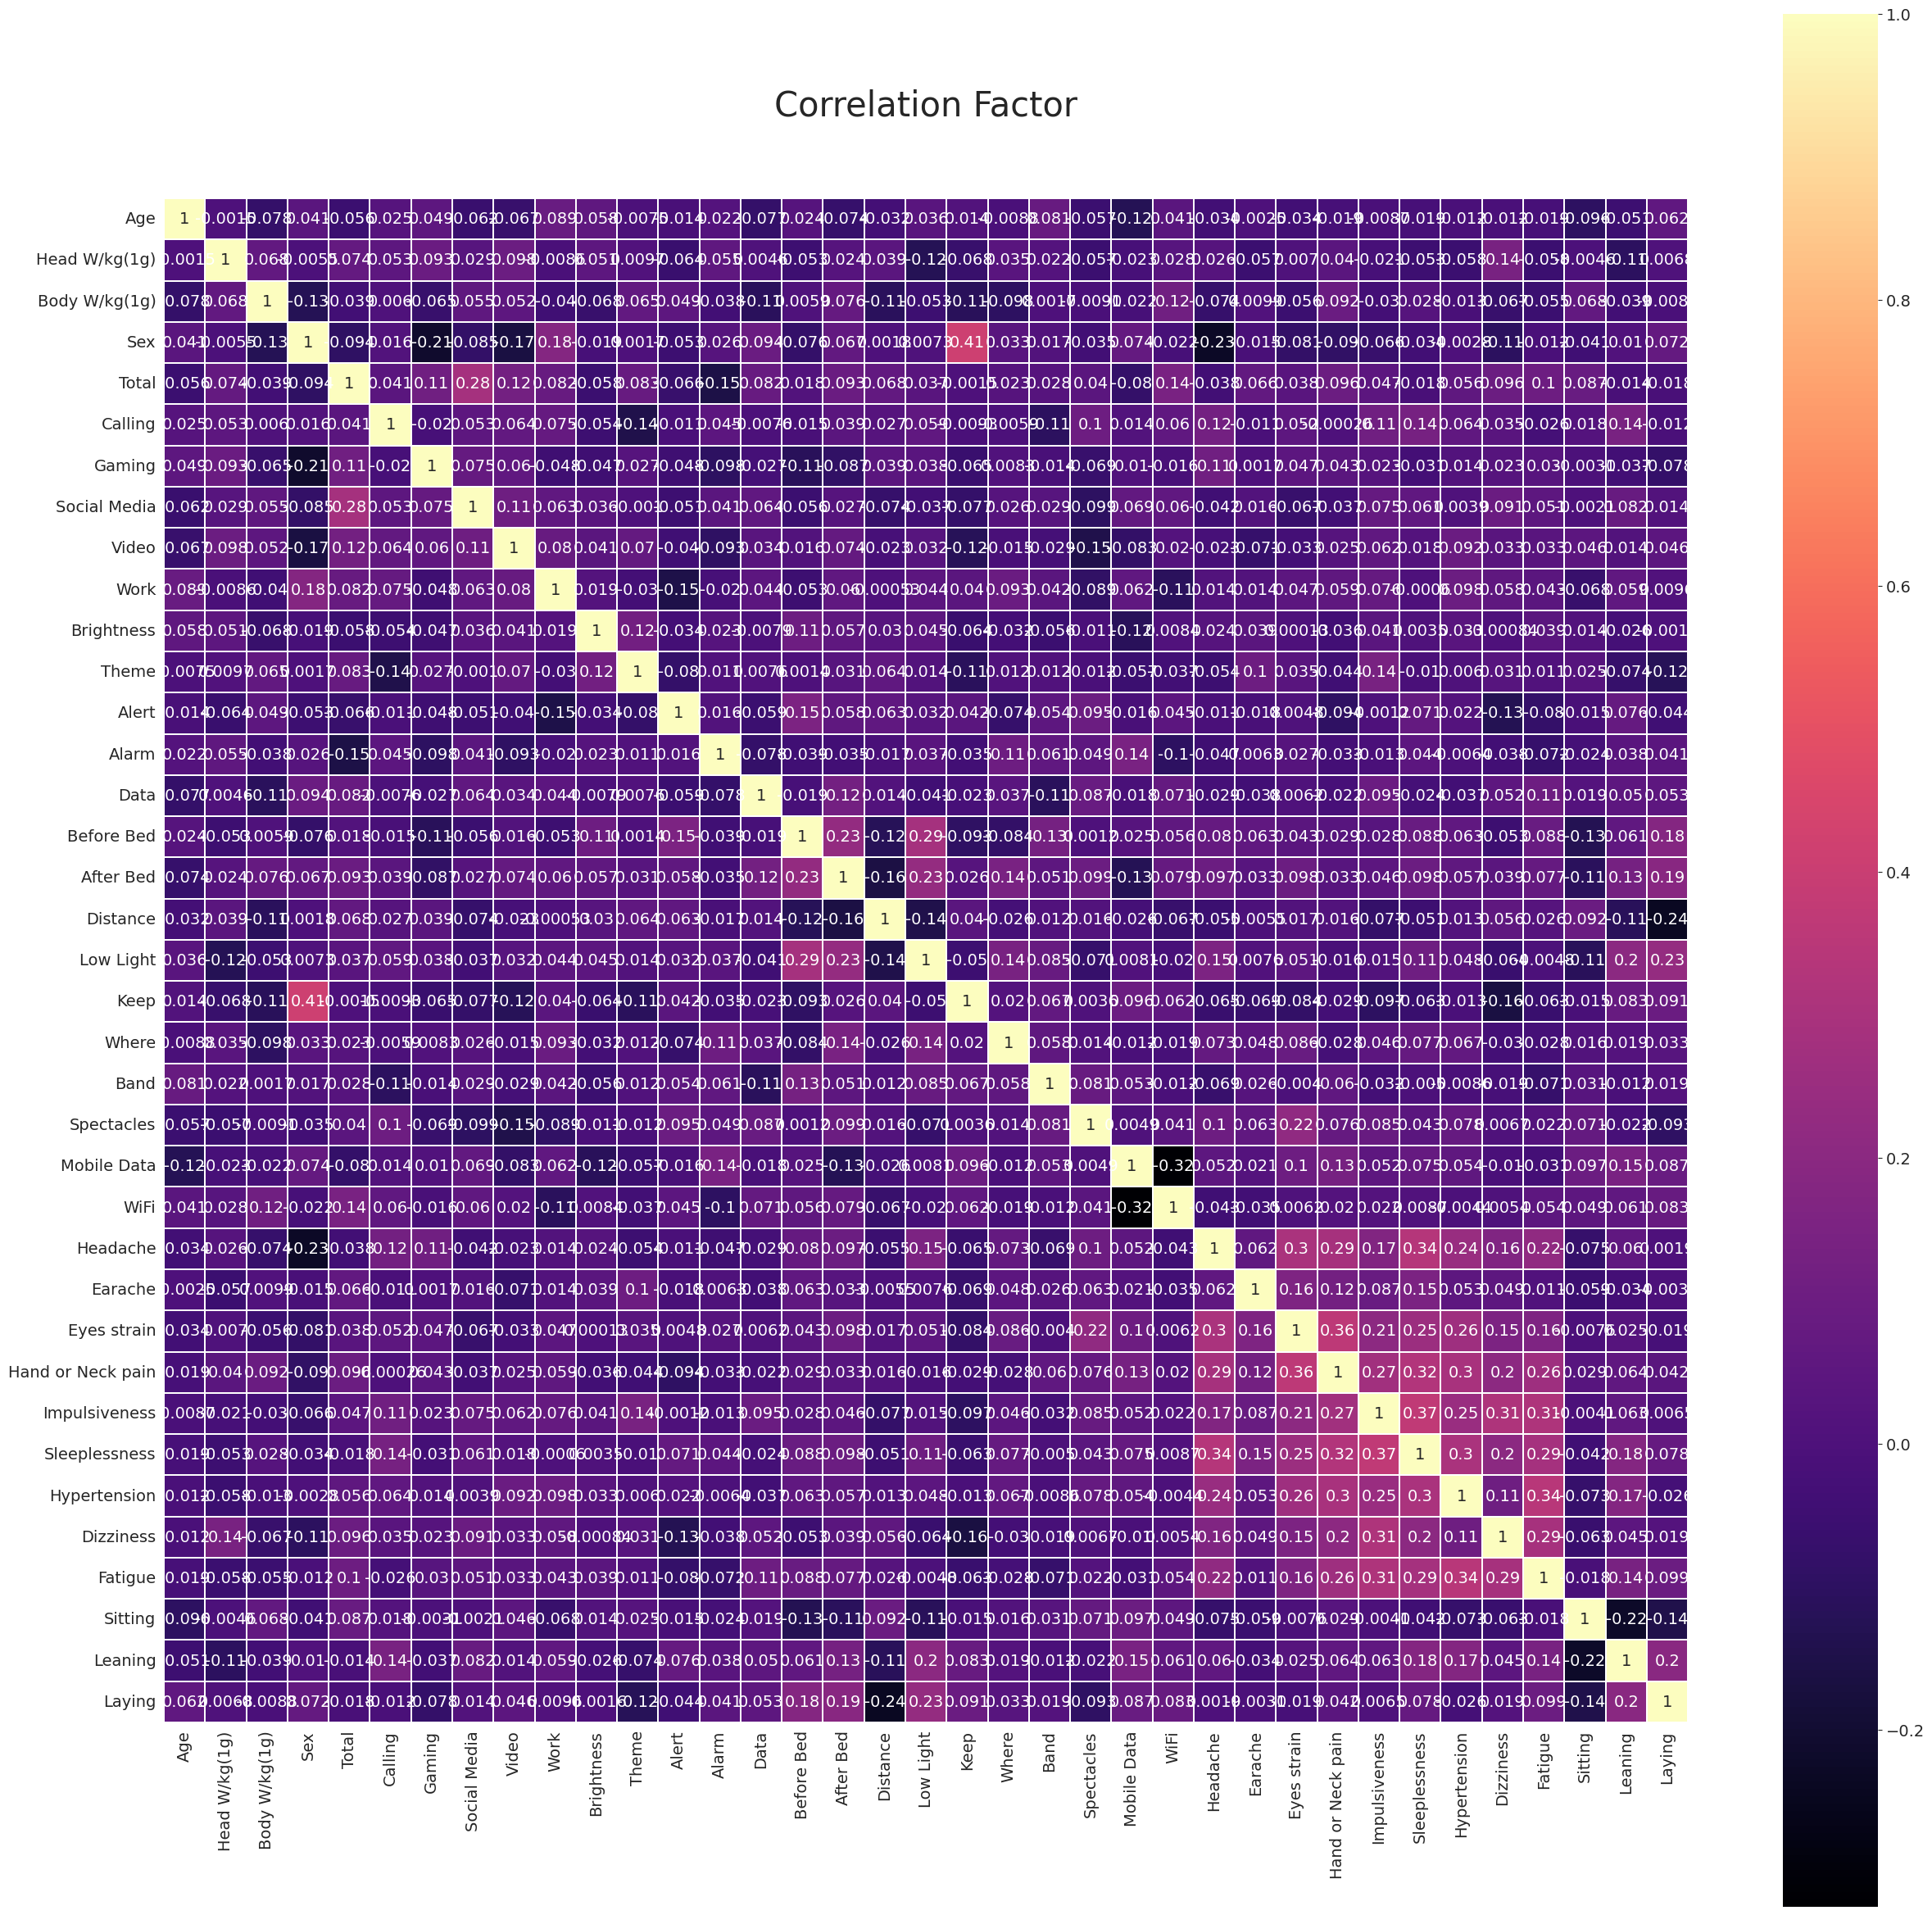

In [ ]:
#Correlation
colormap = plt.cm.magma
plt.figure(figsize=(30,30))
plt.title('Correlation Factor', y=1.05, size=30)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)

# Hypothesis Testing & Chi Square Test

### H0= The variables are independent of each other.
### H1= The variables are not independent of each other.
### p<0.05 is significant.

In [ ]:
def chi2_by_hand(df, col1, col2):
    #---create the contingency table---
    df_cont = pd.crosstab(index = df[col1], columns = df[col2])
    #display(df_cont)
    #---calculate degree of freedom---
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---sum up the totals for row and columns---
    df_cont.loc[:,'Total']= df_cont.sum(axis=1)
    df_cont.loc['Total']= df_cont.sum()
    #print('---Observed (O)---')
    #display(df_cont)
    #---create the expected value dataframe---
    df_exp = df_cont.copy()
    df_exp.iloc[:,:] = np.multiply.outer(
        df_cont.sum(1).values,df_cont.sum().values) / df_cont.sum().sum()
    #print('---Expected (E)---')
    #display(df_exp)

    # calculate chi-square values
    df_chi2 = ((df_cont - df_exp)**2) / df_exp
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()

    #print('---Chi-Square---')
    #display(df_chi2)
    #---get chi-square score---
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()

    #---calculate the p-value---
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)


    return chi_square_score, degree_f, p

In [ ]:
t_df= df.copy()

## Health with SAR value of mobile

In [ ]:
Health_Association = df[['Gender',
                         'Age',
                         'Mobile Phone Brand',
                         'Model',
                         'Head W/kg(1g)',
                         'Body W/kg(1g)',
                         'Health Issues']]

In [ ]:
Health_Association.head()

Gender  Age Mobile Phone Brand     Model  Head W/kg(1g)  Body W/kg(1g)  \
0   Male   21            Oneplus   NORD CE          1.190          1.060   
1   Male   22            Oneplus        7T          1.060          0.930   
2   Male   23            Samsung  Galaxy A          0.836          0.000   
3   Male   22            Oneplus    Nord 2          1.140          1.150   
4   Male   22             Realme     3 Pro          1.159          0.739   

  Health Issues  
0           Yes  
1           Yes  
2           Yes  
3            No  
4           Yes

In [ ]:
# Health_Association['Gender'] = label_encoder.fit_transform(Health_Association['Gender'])
# Health_Association['Mobile Phone Brand'] = label_encoder.fit_transform(Health_Association['Mobile Phone Brand'])
# Health_Association['Model'] = label_encoder.fit_transform(Health_Association['Model'])
# Health_Association.head()

In [ ]:
chi_score11, degree_f11, p11 = chi2_by_hand(df,'Health Issues','Gender')
print(f'Chi2_score: {chi_score11}, Degrees of freedom: {degree_f11}, p-value: {p11}')

Chi2_score: 7.62225754527163, Degrees of freedom: 1, p-value: 0.005765227262309593


In [ ]:
chi_score12, degree_f12, p12 = chi2_by_hand(df,'Health Issues','Age')
print(f'Chi2_score: {chi_score12}, Degrees of freedom: {degree_f12}, p-value: {p12}')

Chi2_score: 20.805640992831893, Degrees of freedom: 26, p-value: 0.7519255914694323


In [ ]:
chi_score13, degree_f13, p13 = chi2_by_hand(df,'Health Issues','Mobile Phone Brand')
print(f'Chi2_score: {chi_score13}, Degrees of freedom: {degree_f13}, p-value: {p13}')

Chi2_score: 9.300257914196495, Degrees of freedom: 10, p-value: 0.5038648346522526


In [ ]:
chi_score14, degree_f14, p14 = chi2_by_hand(df,'Health Issues','Model')
print(f'Chi2_score: {chi_score14}, Degrees of freedom: {degree_f14}, p-value: {p14}')

Chi2_score: 104.41554418381504, Degrees of freedom: 108, p-value: 0.5797036995901589


In [ ]:
chi_score15, degree_f15, p15 = chi2_by_hand(df,'Health Issues','Head W/kg(1g)')
print(f'Chi2_score: {chi_score15}, Degrees of freedom: {degree_f15}, p-value: {p15}')

Chi2_score: 112.00298770400178, Degrees of freedom: 106, p-value: 0.32623014577741005


In [ ]:
chi_score16, degree_f16, p16 = chi2_by_hand(df,'Health Issues','Body W/kg(1g)')
print(f'Chi2_score: {chi_score16}, Degrees of freedom: {degree_f16}, p-value: {p16}')

Chi2_score: 105.50191746031747, Degrees of freedom: 110, p-value: 0.603483742420322


In [ ]:
from tabulate import tabulate

mydata = [['Gender', p11],
                         ['Age', p12],
                         ['Mobile Phone Brand', p13],
                         ['Model', p14],
                         ['Head W/kg(1g)', p15],
                         ['Body W/kg(1g)', p16]]

# create header
head = ["Features", "p values"]

# display table
print(tabulate(mydata, headers= head, tablefmt="grid"))

+--------------------+------------+
| Features           |   p values |
+====================+============+
| Gender             | 0.00576523 |
+--------------------+------------+
| Age                | 0.751926   |
+--------------------+------------+
| Mobile Phone Brand | 0.503865   |
+--------------------+------------+
| Model              | 0.579704   |
+--------------------+------------+
| Head W/kg(1g)      | 0.32623    |
+--------------------+------------+
| Body W/kg(1g)      | 0.603484   |
+--------------------+------------+


###Overall health is found to be assosiated with gender but not directly assosiated with SAR value of mobile

## Health vs Mobile Phone usage

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Health Issues','Mobile Phone Usage (in hours)')
print(f'Chi2_score: {chi_score21}, Degrees of freedom: {degree_f21}, p-value: {p21}')

Chi2_score: 6.104568399934596, Degrees of freedom: 4, p-value: 0.19147395633797673


In [ ]:
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Health Issues','Average time spent over calling (in a day)')
print(f'Chi2_score: {chi_score22}, Degrees of freedom: {degree_f22}, p-value: {p22}')

Chi2_score: 4.849659994820028, Degrees of freedom: 6, p-value: 0.563235104511963


In [ ]:
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Health Issues','Average time spent in gaming (in a day)')
print(f'Chi2_score: {chi_score23}, Degrees of freedom: {degree_f23}, p-value: {p23}')

Chi2_score: 10.404436374507519, Degrees of freedom: 7, p-value: 0.16678918637156864


In [ ]:
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Health Issues','Average time spent on Social Media (in a day)')
print(f'Chi2_score: {chi_score24}, Degrees of freedom: {degree_f24}, p-value: {p24}')

Chi2_score: 10.902852016631046, Degrees of freedom: 8, p-value: 0.2072647359030397


In [ ]:
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Health Issues','Average time spent playing videos (in a day)')
print(f'Chi2_score: {chi_score25}, Degrees of freedom: {degree_f25}, p-value: {p25}')

Chi2_score: 2.0572626774960265, Degrees of freedom: 6, p-value: 0.9143574943939593


In [ ]:
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Health Issues','Average time spent in productive work (in a day)')
print(f'Chi2_score: {chi_score26}, Degrees of freedom: {degree_f26}, p-value: {p26}')

Chi2_score: 1.1146035448216736, Degrees of freedom: 3, p-value: 0.7735499508446078


In [ ]:
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Health Issues','Preferred Screen Brightness Level')
print(f'Chi2_score: {chi_score27}, Degrees of freedom: {degree_f27}, p-value: {p27}')

Chi2_score: 1.1759526767324073, Degrees of freedom: 3, p-value: 0.7587774408526244


In [ ]:
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Health Issues','Preferred theme')
print(f'Chi2_score: {chi_score28}, Degrees of freedom: {degree_f28}, p-value: {p28}')

Chi2_score: 0.9040249869359003, Degrees of freedom: 2, p-value: 0.6363462195043257


In [ ]:
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Health Issues','Preferred Alert Mode')
print(f'Chi2_score: {chi_score29}, Degrees of freedom: {degree_f29}, p-value: {p29}')

Chi2_score: 3.042273915229819, Degrees of freedom: 2, p-value: 0.21846336211474815


In [ ]:
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Health Issues','Do you set Alarm on mobile?')
print(f'Chi2_score: {chi_score210}, Degrees of freedom: {degree_f210}, p-value: {p210}')

Chi2_score: 0.19383414899672596, Degrees of freedom: 1, p-value: 0.6597444642866883


In [ ]:
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Health Issues','Average data consumption in a day?')
print(f'Chi2_score: {chi_score211}, Degrees of freedom: {degree_f211}, p-value: {p211}')

Chi2_score: 3.5744291695702772, Degrees of freedom: 4, p-value: 0.4666518304945316


In [ ]:
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Health Issues','Do you use your mobile just before going to bed?')
print(f'Chi2_score: {chi_score212}, Degrees of freedom: {degree_f212}, p-value: {p212}')

Chi2_score: 0.48276819665115983, Degrees of freedom: 1, p-value: 0.48717110568136035


In [ ]:
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Health Issues','Do you use your mobile phone just after waking up?')
print(f'Chi2_score: {chi_score213}, Degrees of freedom: {degree_f213}, p-value: {p213}')

Chi2_score: 3.742893742872852, Degrees of freedom: 1, p-value: 0.05303252616841986


In [ ]:
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Health Issues','Distance between eyes and mobile screen while using')
print(f'Chi2_score: {chi_score214}, Degrees of freedom: {degree_f214}, p-value: {p214}')

Chi2_score: 4.607861164310126, Degrees of freedom: 2, p-value: 0.09986554156036946


In [ ]:
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Health Issues','Do you use your mobile in low light conditions?')
print(f'Chi2_score: {chi_score215}, Degrees of freedom: {degree_f215}, p-value: {p215}')

Chi2_score: 3.363544647422487, Degrees of freedom: 1, p-value: 0.06665445358131647


In [ ]:
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Health Issues','Where do you keep your mobile while sleeping?')
print(f'Chi2_score: {chi_score216}, Degrees of freedom: {degree_f216}, p-value: {p216}')

Chi2_score: 9.016005448906856, Degrees of freedom: 3, p-value: 0.029078840513201115


In [ ]:
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Health Issues','Do you also use device such as fitness band or smart watch?')
print(f'Chi2_score: {chi_score217}, Degrees of freedom: {degree_f217}, p-value: {p217}')

Chi2_score: 0.7828543244330088, Degrees of freedom: 1, p-value: 0.37626960503444873


In [ ]:
mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))

+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.191474  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.563235  |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.166789  |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.207265  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.914357  |
+-------------------------------------------------------------+------------+

###Headache

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Headache','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Headache','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Headache','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Headache','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Headache','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Headache','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Headache','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Headache','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Headache','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Headache','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Headache','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Headache','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Headache','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Headache','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Headache','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Headache','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Headache','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))

+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.566052  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.206881  |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.283389  |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.922554  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.321941  |
+-------------------------------------------------------------+------------+

###Earache

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Earache','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Earache','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Earache','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Earache','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Earache','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Earache','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Earache','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Earache','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Earache','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Earache','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Earache','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Earache','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Earache','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Earache','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Earache','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Earache','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Earache','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |   0.066616 |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |   0.706653 |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |   0.309016 |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |   0.954674 |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |   0.310318 |
+-------------------------------------------------------------+------------+

###Eyes strain

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Eyes strain','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Eyes strain','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Eyes strain','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Eyes strain','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Eyes strain','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Eyes strain','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Eyes strain','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Eyes strain','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Eyes strain','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Eyes strain','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Eyes strain','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Eyes strain','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Eyes strain','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Eyes strain','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Eyes strain','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Eyes strain','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Eyes strain','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.862958  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.606867  |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.554403  |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.435163  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.429434  |
+-------------------------------------------------------------+------------+

###Hand or Neck pain

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Hand or Neck pain','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Hand or Neck pain','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Hand or Neck pain','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Hand or Neck pain','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Hand or Neck pain','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Hand or Neck pain','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Hand or Neck pain','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Hand or Neck pain','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Hand or Neck pain','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Hand or Neck pain','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Hand or Neck pain','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Hand or Neck pain','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Hand or Neck pain','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Hand or Neck pain','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Hand or Neck pain','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Hand or Neck pain','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Hand or Neck pain','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |   0.108927 |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |   0.563919 |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |   0.696986 |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |   0.838285 |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |   0.671397 |
+-------------------------------------------------------------+------------+

###Impulsiveness

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Impulsiveness','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Impulsiveness','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Impulsiveness','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Impulsiveness','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Impulsiveness','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Impulsiveness','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Impulsiveness','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Impulsiveness','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Impulsiveness','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Impulsiveness','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Impulsiveness','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Impulsiveness','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Impulsiveness','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Impulsiveness','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Impulsiveness','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Impulsiveness','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Impulsiveness','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.285494  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.0769076 |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.897602  |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.551255  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.0711406 |
+-------------------------------------------------------------+------------+

###Sleeplessness

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Sleeplessness','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Sleeplessness','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Sleeplessness','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Sleeplessness','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Sleeplessness','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Sleeplessness','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Sleeplessness','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Sleeplessness','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Sleeplessness','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Sleeplessness','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Sleeplessness','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Sleeplessness','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Sleeplessness','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Sleeplessness','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Sleeplessness','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Sleeplessness','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Sleeplessness','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.711692  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.138406  |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.032776  |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.283508  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.129686  |
+-------------------------------------------------------------+------------+

###Hypertension

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Hypertension','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Hypertension','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Hypertension','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Hypertension','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Hypertension','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Hypertension','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Hypertension','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Hypertension','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Hypertension','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Hypertension','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Hypertension','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Hypertension','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Hypertension','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Hypertension','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Hypertension','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Hypertension','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Hypertension','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.329866  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.0894454 |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.907286  |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.626677  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.37985   |
+-------------------------------------------------------------+------------+

###Dizziness

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Dizziness','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Dizziness','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Dizziness','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Dizziness','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Dizziness','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Dizziness','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Dizziness','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Dizziness','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Dizziness','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Dizziness','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Dizziness','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Dizziness','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Dizziness','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Dizziness','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Dizziness','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Dizziness','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Dizziness','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.238637  |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.166386  |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.0361981 |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.35445   |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.322942  |
+-------------------------------------------------------------+------------+

###Fatigue

In [ ]:
chi_score21, degree_f21, p21 = chi2_by_hand(df,'Fatigue','Mobile Phone Usage (in hours)')
chi_score22, degree_f22, p22 = chi2_by_hand(df,'Fatigue','Average time spent over calling (in a day)')
chi_score23, degree_f23, p23 = chi2_by_hand(df,'Fatigue','Average time spent in gaming (in a day)')
chi_score24, degree_f24, p24 = chi2_by_hand(df,'Fatigue','Average time spent on Social Media (in a day)')
chi_score25, degree_f25, p25 = chi2_by_hand(df,'Fatigue','Average time spent playing videos (in a day)')
chi_score26, degree_f26, p26 = chi2_by_hand(df,'Fatigue','Average time spent in productive work (in a day)')
chi_score27, degree_f27, p27 = chi2_by_hand(df,'Fatigue','Preferred Screen Brightness Level')
chi_score28, degree_f28, p28 = chi2_by_hand(df,'Fatigue','Preferred theme')
chi_score29, degree_f29, p29 = chi2_by_hand(df,'Fatigue','Preferred Alert Mode')
chi_score210, degree_f210, p210 = chi2_by_hand(df,'Fatigue','Do you set Alarm on mobile?')
chi_score211, degree_f211, p211 = chi2_by_hand(df,'Fatigue','Average data consumption in a day?')
chi_score212, degree_f212, p212 = chi2_by_hand(df,'Fatigue','Do you use your mobile just before going to bed?')
chi_score213, degree_f213, p213 = chi2_by_hand(df,'Fatigue','Do you use your mobile phone just after waking up?')
chi_score214, degree_f214, p214 = chi2_by_hand(df,'Fatigue','Distance between eyes and mobile screen while using')
chi_score215, degree_f215, p215 = chi2_by_hand(df,'Fatigue','Do you use your mobile in low light conditions?')
chi_score216, degree_f216, p216 = chi2_by_hand(df,'Fatigue','Where do you keep your mobile while sleeping?')
chi_score217, degree_f217, p217 = chi2_by_hand(df,'Fatigue','Do you also use device such as fitness band or smart watch?')

mydata = [['Mobile Phone Usage (in hours)', p21],
          ['Average time spent over calling (in a day)', p22],
          ['Average time spent in gaming (in a day)', p23],
          ['Average time spent on Social Media (in a day)', p24],
          ['Average time spent playing videos (in a day)', p25],
          ['Average time spent in productive work (in a day)', p26],
          ['Preferred Screen Brightness Level', p27],
          ['Preferred theme', p28],
          ['Preferred Alert Mode', p29],
          ['Do you set Alarm on mobile?', p210],
          ['Average data consumption in a day?', p211],
          ['Do you use your mobile just before going to bed?', p212],
          ['Do you use your mobile phone just after waking up?', p213],
          ['Distance between eyes and mobile screen while using', p214],
          ['Do you use your mobile in low light conditions?', p215],
          ['Where do you keep your mobile while sleeping?', p216],
          ['Do you also use device such as fitness band or smart watch?', p217]
          ]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))


+-------------------------------------------------------------+------------+
| Features                                                    |   p values |
+=============================================================+============+
| Mobile Phone Usage (in hours)                               |  0.0129414 |
+-------------------------------------------------------------+------------+
| Average time spent over calling (in a day)                  |  0.438975  |
+-------------------------------------------------------------+------------+
| Average time spent in gaming (in a day)                     |  0.95409   |
+-------------------------------------------------------------+------------+
| Average time spent on Social Media (in a day)               |  0.439387  |
+-------------------------------------------------------------+------------+
| Average time spent playing videos (in a day)                |  0.959951  |
+-------------------------------------------------------------+------------+

##Posture assosiation with health

###Sitting

In [ ]:
chi_score31, degree_f31, p31 = chi2_by_hand(df,'Sitting','Headache')
chi_score32, degree_f32, p32 = chi2_by_hand(df,'Sitting','Earache')
chi_score33, degree_f33, p33 = chi2_by_hand(df,'Sitting','Eyes strain')
chi_score34, degree_f34, p34 = chi2_by_hand(df,'Sitting','Hand or Neck pain')
chi_score35, degree_f35, p35 = chi2_by_hand(df,'Sitting','Impulsiveness')
chi_score36, degree_f36, p36 = chi2_by_hand(df,'Sitting','Sleeplessness')
chi_score37, degree_f37, p37 = chi2_by_hand(df,'Sitting','Hypertension')
chi_score38, degree_f38, p38 = chi2_by_hand(df,'Sitting','Dizziness')
chi_score39, degree_f39, p39 = chi2_by_hand(df,'Sitting','Fatigue')

mydata = [['Headache', p31],
          ['Earache', p32],
          ['Eyes strain', p33],
          ['Hand or Neck pain', p34],
          ['Impulsiveness', p35],
          ['Sleeplessness', p36],
          ['Hypertension', p37],
          ['Dizziness', p38],
          ['Fatigue', p39]]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))

+-------------------+------------+
| Features          |   p values |
+===================+============+
| Headache          |   0.199282 |
+-------------------+------------+
| Earache           |   0.316324 |
+-------------------+------------+
| Eyes strain       |   0.896945 |
+-------------------+------------+
| Hand or Neck pain |   0.615776 |
+-------------------+------------+
| Impulsiveness     |   0.944771 |
+-------------------+------------+
| Sleeplessness     |   0.469088 |
+-------------------+------------+
| Hypertension      |   0.213372 |
+-------------------+------------+
| Dizziness         |   0.283997 |
+-------------------+------------+
| Fatigue           |   0.752708 |
+-------------------+------------+


###Leaning

In [ ]:
chi_score31, degree_f31, p31 = chi2_by_hand(df,'Leaning','Headache')
chi_score32, degree_f32, p32 = chi2_by_hand(df,'Leaning','Earache')
chi_score33, degree_f33, p33 = chi2_by_hand(df,'Leaning','Eyes strain')
chi_score34, degree_f34, p34 = chi2_by_hand(df,'Leaning','Hand or Neck pain')
chi_score35, degree_f35, p35 = chi2_by_hand(df,'Leaning','Impulsiveness')
chi_score36, degree_f36, p36 = chi2_by_hand(df,'Leaning','Sleeplessness')
chi_score37, degree_f37, p37 = chi2_by_hand(df,'Leaning','Hypertension')
chi_score38, degree_f38, p38 = chi2_by_hand(df,'Leaning','Dizziness')
chi_score39, degree_f39, p39 = chi2_by_hand(df,'Leaning','Fatigue')

mydata = [['Headache', p31],
          ['Earache', p32],
          ['Eyes strain', p33],
          ['Hand or Neck pain', p34],
          ['Impulsiveness', p35],
          ['Sleeplessness', p36],
          ['Hypertension', p37],
          ['Dizziness', p38],
          ['Fatigue', p39]]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))

+-------------------+------------+
| Features          |   p values |
+===================+============+
| Headache          | 0.307174   |
+-------------------+------------+
| Earache           | 0.565467   |
+-------------------+------------+
| Eyes strain       | 0.674723   |
+-------------------+------------+
| Hand or Neck pain | 0.276851   |
+-------------------+------------+
| Impulsiveness     | 0.282596   |
+-------------------+------------+
| Sleeplessness     | 0.00207997 |
+-------------------+------------+
| Hypertension      | 0.00289233 |
+-------------------+------------+
| Dizziness         | 0.441592   |
+-------------------+------------+
| Fatigue           | 0.0192881  |
+-------------------+------------+


###Laying

In [ ]:
chi_score31, degree_f31, p31 = chi2_by_hand(df,'Laying','Headache')
chi_score32, degree_f32, p32 = chi2_by_hand(df,'Laying','Earache')
chi_score33, degree_f33, p33 = chi2_by_hand(df,'Laying','Eyes strain')
chi_score34, degree_f34, p34 = chi2_by_hand(df,'Laying','Hand or Neck pain')
chi_score35, degree_f35, p35 = chi2_by_hand(df,'Laying','Impulsiveness')
chi_score36, degree_f36, p36 = chi2_by_hand(df,'Laying','Sleeplessness')
chi_score37, degree_f37, p37 = chi2_by_hand(df,'Laying','Hypertension')
chi_score38, degree_f38, p38 = chi2_by_hand(df,'Laying','Dizziness')
chi_score39, degree_f39, p39 = chi2_by_hand(df,'Laying','Fatigue')

mydata = [['Headache', p31],
          ['Earache', p32],
          ['Eyes strain', p33],
          ['Hand or Neck pain', p34],
          ['Impulsiveness', p35],
          ['Sleeplessness', p36],
          ['Hypertension', p37],
          ['Dizziness', p38],
          ['Fatigue', p39]]

head = ["Features", "p values"]

print(tabulate(mydata, headers= head, tablefmt="grid"))

+-------------------+------------+
| Features          |   p values |
+===================+============+
| Headache          |  0.97345   |
+-------------------+------------+
| Earache           |  0.957883  |
+-------------------+------------+
| Eyes strain       |  0.750728  |
+-------------------+------------+
| Hand or Neck pain |  0.474116  |
+-------------------+------------+
| Impulsiveness     |  0.912163  |
+-------------------+------------+
| Sleeplessness     |  0.184141  |
+-------------------+------------+
| Hypertension      |  0.66237   |
+-------------------+------------+
| Dizziness         |  0.748234  |
+-------------------+------------+
| Fatigue           |  0.0907928 |
+-------------------+------------+


#INTERPRETION OF RESULT

In [ ]:
(m['Mobile Phone Brand'].value_counts(normalize=True) * 100).round(1)

Apple       20.5
Samsung     20.2
Realme      17.5
Xiaomi      15.1
Oneplus     12.3
OPPO         3.8
Vivo         3.8
Poco         2.4
Other        2.4
Motorola     1.7
Nokia        0.3
Name: Mobile Phone Brand, dtype: float64

In [ ]:
m.groupby("Mobile Phone Brand").mean().sort_values(by='Head W/kg(1g)')

Head W/kg(1g)  Body W/kg(1g)
Mobile Phone Brand                              
Samsung                  0.737678       0.463746
Poco                     0.881857       0.619143
Vivo                     0.931182       0.639182
Xiaomi                   0.934068       0.623455
Nokia                    1.000000       0.000000
Motorola                 1.049000       0.828000
Other                    1.053286       0.800286
Realme                   1.063745       0.706961
Oneplus                  1.091333       0.820667
OPPO                     1.156636       0.580364
Apple                    1.262067       0.667933

In [ ]:
m.groupby("Mobile Phone Brand").mean().sort_values(by='Head W/kg(1g)').to_csv('brand_SAR.csv')

<Axes: ylabel='Mobile Phone Brand'>

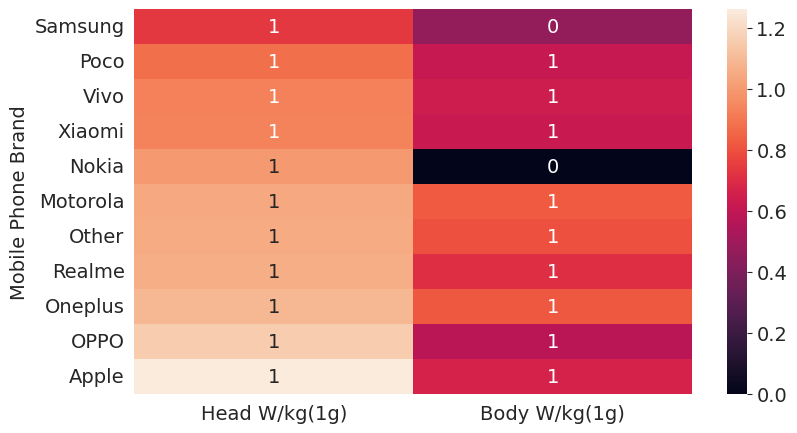

In [ ]:
sns.heatmap(m.groupby("Mobile Phone Brand").mean().sort_values(by='Head W/kg(1g)'), annot = True, fmt = '.0f')

In [ ]:
m.groupby(['Mobile Phone Brand', 'Model']).mean().sort_values(by='Head W/kg(1g)')


Head W/kg(1g)  Body W/kg(1g)
Mobile Phone Brand Model                                   
Xiaomi             8A Dual          0.236000       0.000000
                   Note 11          0.255000       1.000000
                   Note 8           0.255000       1.000000
Samsung            Galaxy S         0.277333       1.066667
                   Galaxy F         0.490200       0.720000
...                                      ...            ...
OPPO               F17              1.400000       1.180000
Apple              13               1.437500       0.593750
                   12 Pro           1.460000       0.380000
                   13 Pro Max       1.600000       0.000000
                   12 Pro Max       1.600000       0.000000

[118 rows x 2 columns]

In [ ]:
m.groupby(['Mobile Phone Brand', 'Model']).mean().sort_values(by='Head W/kg(1g)').to_csv('model_SAR.csv')

<Axes: ylabel='Mobile Phone Brand-Model'>

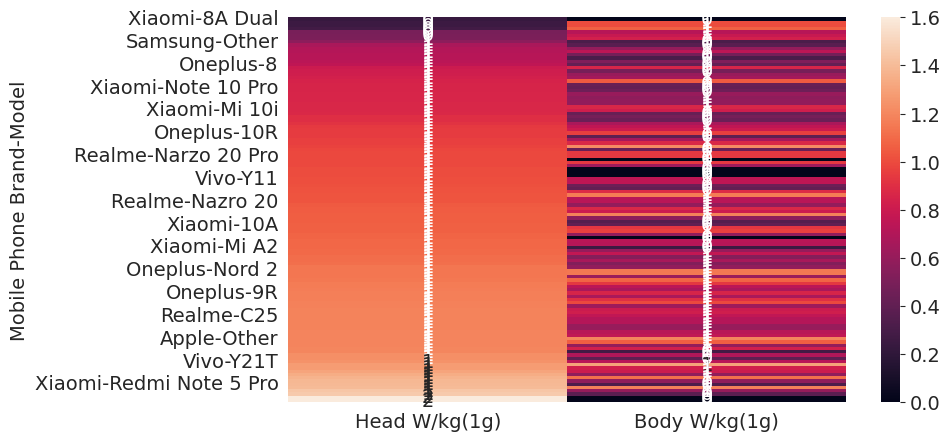

In [ ]:
sns.heatmap(m.groupby(['Mobile Phone Brand', 'Model']).mean().sort_values(by='Head W/kg(1g)'), annot = True, fmt = '.0f')

In [ ]:
m = m[m['Model'] != 'Other']

##Samsung

In [ ]:
samsung = m[(m['Mobile Phone Brand'] == 'Samsung')]

In [ ]:
(samsung['Model'].value_counts(normalize=True) * 100).round(1)

Galaxy M    61.1
Galaxy A    24.1
Galaxy F     9.3
Galaxy S     5.6
Name: Model, dtype: float64

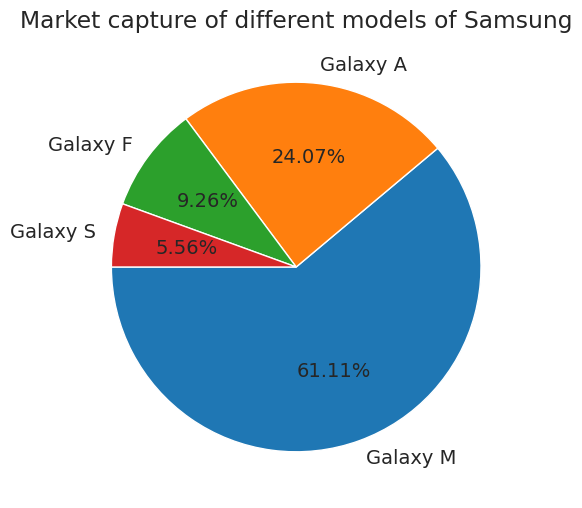

In [ ]:
t = samsung['Model'].value_counts()
t_per =  t/ len(samsung['Model']) * 100

plt.figure(figsize=(12,6))
plt.title('Market capture of different models of Samsung')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

In [ ]:
samsung.groupby(['Model']).mean().sort_values(by='Head W/kg(1g)')


Head W/kg(1g)  Body W/kg(1g)
Model                                 
Galaxy S       0.277333       1.066667
Galaxy F       0.490200       0.720000
Galaxy A       0.670692       0.373615
Galaxy M       0.869273       0.427697

Text(0.5, 1.0, 'SAR Head W/kg(1g) vs Market capture of different Model of Samsung')

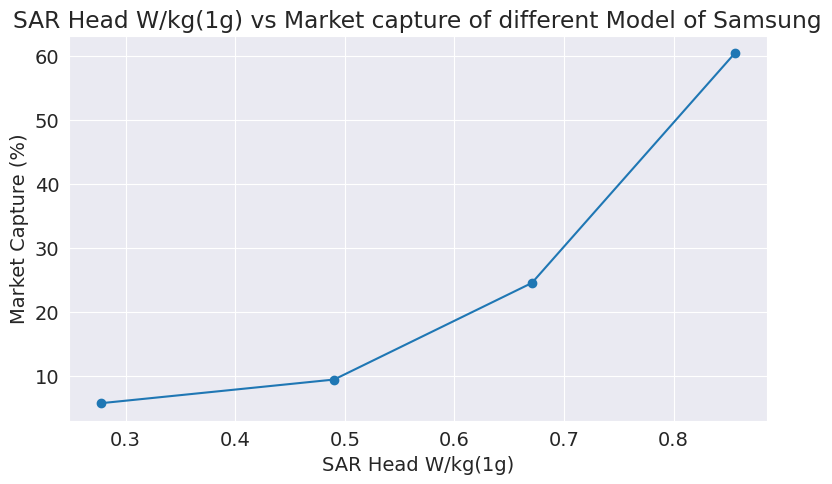

In [ ]:
sar = [0.277333, 0.490200, 0.670692, 0.855812]
mar = [5.7, 9.4, 24.5, 60.4]
plt.plot(sar,mar, marker = 'o')
plt.xlabel('SAR Head W/kg(1g)')
# naming the y axis
plt.ylabel('Market Capture (%)')
plt.title('SAR Head W/kg(1g) vs Market capture of different Model of Samsung')

##Apple

In [ ]:
apple = m[(m['Mobile Phone Brand'] == 'Apple')]

In [ ]:
(apple['Model'].value_counts(normalize=True) * 100).round(1)

11            26.3
12            21.1
13            14.0
XR             8.8
13 Pro         5.3
12 Pro         5.3
12 Mini        3.5
13 Mini        3.5
SE             3.5
11 Pro         3.5
14 Pro         1.8
12 Pro Max     1.8
13 Pro Max     1.8
Name: Model, dtype: float64

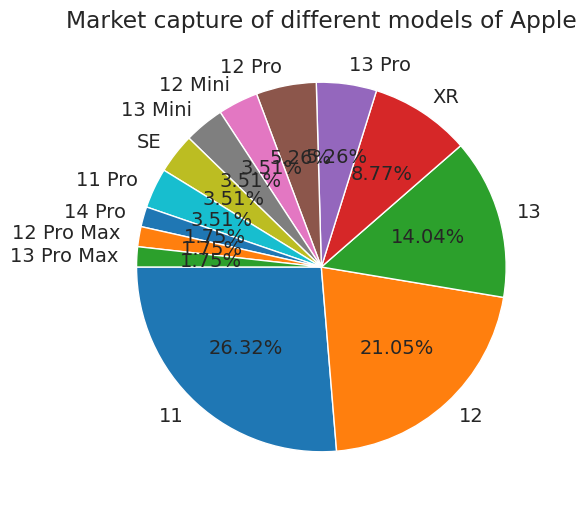

In [ ]:
t = apple['Model'].value_counts()
t_per =  t/ len(apple['Model']) * 100

plt.figure(figsize=(12,6))
plt.title('Market capture of different models of Apple')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

In [ ]:
apple.groupby(['Model']).mean().sort_values(by='Head W/kg(1g)')

Head W/kg(1g)  Body W/kg(1g)
Model                                   
12 Mini          0.947000       0.803000
14 Pro           1.000000       0.000000
12               1.089167       0.734167
13 Mini          1.095000       0.595000
XR               1.230000       0.696000
13 Pro           1.230000       0.393333
11               1.308667       0.802000
11 Pro           1.340000       0.580000
SE               1.385000       0.580000
13               1.437500       0.593750
12 Pro           1.460000       0.380000
12 Pro Max       1.600000       0.000000
13 Pro Max       1.600000       0.000000

##Realme

In [ ]:
realme = m[(m['Mobile Phone Brand'] == 'Realme')]

In [ ]:
(realme['Model'].value_counts(normalize=True) * 100).round(1)

6               11.1
6i               6.7
GT Neo 3T        6.7
7 Pro            6.7
Narzo 20 Pro     4.4
7                4.4
X2 Pro           4.4
9                4.4
8                4.4
5i               4.4
8i               4.4
Nazro 20         2.2
X50 Pro          2.2
C3               2.2
GT               2.2
Narzo 50         2.2
9 Pro Plus       2.2
3 Pro            2.2
Narzo 30 Pro     2.2
C25              2.2
X                2.2
Narzo 10         2.2
5s               2.2
9 Pro            2.2
C15              2.2
7i               2.2
Narzo 30         2.2
C2               2.2
Name: Model, dtype: float64

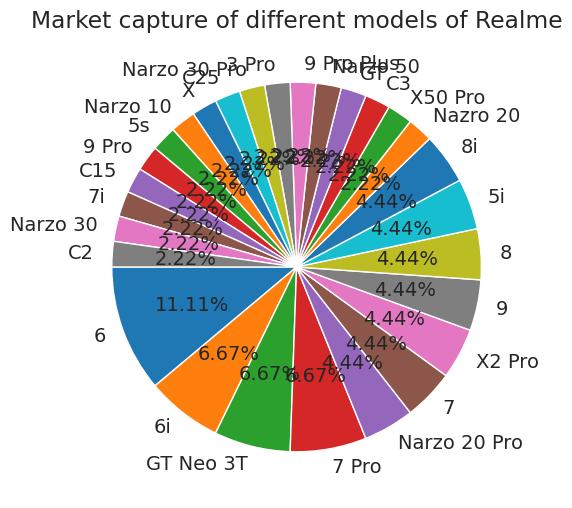

In [ ]:
t = realme['Model'].value_counts()
t_per =  t/ len(realme['Model']) * 100

plt.figure(figsize=(12,6))
plt.title('Market capture of different models of Realme')
plt.pie(t_per, labels= t_per.index, autopct='%1.2f%%', startangle=180);

In [ ]:
realme.groupby(['Model']).mean().sort_values(by='Head W/kg(1g)')

Head W/kg(1g)  Body W/kg(1g)
Model                                     
7 Pro                0.7340         0.5160
Narzo 10             0.8570         0.6090
9 Pro                0.8980         0.4380
Narzo 30             0.9720         1.2180
7                    0.9900         0.9340
7i                   0.9900         0.0000
Narzo 20 Pro         0.9900         0.9340
X2 Pro               1.0235         0.8850
Nazro 20             1.0310         0.7300
X50 Pro              1.0480         0.5910
GT                   1.0570         1.1810
6                    1.0572         0.5684
9                    1.1075         0.6655
C3                   1.1130         0.5310
6i                   1.1380         0.5860
5i                   1.1400         0.6155
8                    1.1570         0.9335
3 Pro                1.1590         0.7390
GT Neo 3T            1.1730         0.9020
8i                   1.1730         0.6700
5s                   1.1800         0.6310
Narzo 50             1.1840         0.8240
C25                  1.1840         0.7590
C15                  1.1840         0.7090
9 Pro Plus           1.1880         0.7270
Narzo 30 Pro         1.1880         0.7580
X                    1.1970         0.8290
C2                   1.2800         0.8310

##Xiaomi

In [ ]:
xiaomi = m[(m['Mobile Phone Brand'] == 'Xiaomi')]

In [ ]:
(xiaomi['Model'].value_counts(normalize=True) * 100).round(1)

Note 7 Pro          13.6
Note 10 Pro         11.4
Note 9 Pro Max       9.1
Redmi Note 5 Pro     6.8
Note 10 Pro Max      6.8
Redmi Note 6 Pro     4.5
10A                  4.5
Note 9 Pro           4.5
Note 8 Pro           4.5
K20 Pro              2.3
Mi A2                2.3
Note 10              2.3
Note 8               2.3
9 Activ              2.3
Note 11              2.3
11i                  2.3
Mi 10i               2.3
Note 10S             2.3
Note 11 Pro          2.3
11T Pro              2.3
8A Dual              2.3
Note 9               2.3
11 Lite NE           2.3
Redmi 7              2.3
Name: Model, dtype: float64

In [ ]:
xiaomi.groupby(['Model']).mean().sort_values(by='Head W/kg(1g)')

Head W/kg(1g)  Body W/kg(1g)
Model                                         
8A Dual                0.236000        0.00000
Note 8                 0.255000        1.00000
Note 11                0.255000        1.00000
9 Activ                0.506000        0.83300
Note 11 Pro            0.800000        0.86200
11i                    0.824000        0.60800
Note 10 Pro Max        0.833333        0.64800
Redmi Note 6 Pro       0.844000        1.04800
Note 9                 0.853000        0.43300
Note 10 Pro            0.853200        0.41360
11 Lite NE             0.859000        0.56900
11T Pro                0.861000        0.58300
Note 10                0.863000        0.58500
Note 10S               0.864000        0.86300
Mi 10i                 0.867000        0.82500
Note 9 Pro             0.898000        0.48300
Redmi 7                1.000000        0.00000
K20 Pro                1.030000        0.72000
Note 9 Pro Max         1.060000        0.35625
10A                    1.064000        0.39550
Note 7 Pro             1.068333        0.96500
Mi A2                  1.092000        0.25900
Note 8 Pro             1.365000        1.11700
Redmi Note 5 Pro       1.392000        0.32600

##Oneplus

In [ ]:
oneplus = m[(m['Mobile Phone Brand'] == 'Oneplus')]

In [ ]:
(oneplus['Model'].value_counts(normalize=True) * 100).round(1)

Nord 2            11.4
Nord              11.4
NORD CE            8.6
Nord 2T            8.6
9                  8.6
10R                8.6
7T                 5.7
Nord CE 2          5.7
9 RT               5.7
Nord CE 2 Lite     5.7
8                  5.7
8 Pro              2.9
10T                2.9
7                  2.9
9R                 2.9
7T Pro             2.9
Name: Model, dtype: float64

In [ ]:
oneplus.groupby(['Model']).mean().sort_values(by='Head W/kg(1g)')

Head W/kg(1g)  Body W/kg(1g)
Model                                       
8                    0.750000       0.415000
10R                  0.950000       0.960000
8 Pro                0.960000       0.870000
10T                  0.990000       0.934000
Nord CE 2            1.023000       0.407000
7T                   1.065000       0.925000
Nord                 1.080000       0.585000
7                    1.090000       0.720000
Nord 2               1.140000       1.150000
Nord 2T              1.140000       1.150000
9R                   1.170000       0.850000
9                    1.183333       0.803333
Nord CE 2 Lite       1.186000       0.709000
7T Pro               1.187000       0.606000
NORD CE              1.190000       1.060000
9 RT                 1.193000       0.593000